### Program 1 of 3
### Purpose: Data Preparations to obtain a weekly dataset for factor analysis.
### Inputs: collected data
### Outputs: final weekly dataset for factors analysis ( data\\final\\proposed_dataset_21082023.csv)
### Developer: Rweyemamu Barongo rbarongo@gmail.com, ribarongo@bot.go.tz, ribarongo@udsm.ac.tz


#### Install libraries

In [1]:
#!pip install --upgrade xlrd

In [2]:
#!pip install xlwt

In [3]:
#!pip install IO

In [4]:
!pip install pandas

In [5]:
!pip install matplotlib

#### Import libraries

In [6]:
#preliminary libraries
import preparation
from preparation import install_missing_packages
install_missing_packages()
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
from io import StringIO    
from scipy.optimize import curve_fit
import warnings 
import config_unix_filesystem as config
from config_unix_filesystem import check_model_results_file
from config_unix_filesystem import check_if_exist_or_create_folders
from config_unix_filesystem import check_data_files_I

2023-11-16 17:12:38.961230: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 17:12:39.009086: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 17:12:39.009855: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 17:12:39.696802: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### inspect configurations and source data

In [7]:
check_data_files_I()
check_if_exist_or_create_folders()
check_model_results_file()


#### Load data from files

**Import liquidity secondary data from source**

In [8]:
# Load weekly data from source to pandas dataframe 
df_new=pd.read_csv(config.weeklyDataWbook)
unnamedCols = [col for col in df_new.columns if 'Unnamed' in col]
df_new.drop(columns=unnamedCols, inplace=True)
# df1 = pd.read_excel(config.file1, sheet_name= [0, 1, 2, 3, 4, 5, 6])
# df2 = pd.read_excel(config.file2, sheet_name= [0, 1, 2, 3, 4, 5, 6])

In [9]:
# #join weekly liquidity data pieces
# df_new = pd.concat([df1[0], df1[1],df1[2],df1[3],df1[4],df1[5],df1[6],df2[0], df2[1],df2[2],df2[3],df2[4],df2[5],df2[6]], axis=0)


In [10]:
#view shape of dataframe
df_new.shape    # number of weekly submission rows before sampling commercial banks

(821709, 5)

In [11]:
#view columns in dataframe
df_new.columns

Index(['INSTITUTIONCODE', 'REPORTINGDATE', 'DESC_NO', 'ASSET_AMOUNT',
       'LIABILITY_AMT'],
      dtype='object')

In [12]:
#df_new.to_csv(config.weeklyDataWbook)

In [13]:
#view data 
df_new.head(3)

,INSTITUTIONCODE,REPORTINGDATE,DESC_NO,ASSET_AMOUNT,LIABILITY_AMT
0,B5114,2010-01-15,17.0,0.000000e+00,0.0
1,B5114,2010-01-15,18.0,2.786249e+09,0.0
2,B5114,2010-01-15,19.0,2.511281e+09,0.0


In [14]:
# Explore shape
#df1[0].shape

#### Sampling  (commercial banks existed during review period)
#### Data was anonymised upon collection by changing bank codes from AXXX into BXXXX to conceal banks identity
#### Banks outside the sample were all given a bank code = 'Unsampled'

In [15]:
df_new['INSTITUTIONCODE'].unique()

array(['B5114', 'B5916', 'B5512', nan, 'B5812', 'Unsampled', 'B5116',
       'B5912', 'B5015', 'B5014', 'B5216', 'B5914', 'B5613', 'B5016',
       'B5716', 'B5815', 'B5913', 'B5412', 'B5516', 'B5115', 'B5215',
       'B5515', 'B5213', 'B5813', 'B5413', 'B5117', 'B5814', 'B5417',
       'B5717', 'B5917', 'B5018', 'B5318', 'B5418', 'B5818', 'B5219',
       'B5319', 'B5719', 'B5120', 'B5619', 'B5919'], dtype=object)

In [16]:
# filter one bank and attempt to pivot
mask = (df_new['INSTITUTIONCODE']=='B5114')&(df_new['REPORTINGDATE']=='2010-01-15')
df_new[mask].to_csv(config.weekly_dataset)

In [17]:
# view sorted values by REPORTINGDATE and INSTITUTIONCODE
df_new.sort_values(by=['REPORTINGDATE','INSTITUTIONCODE'])
#df.sort_values(by=['col1', 'col2'])

,INSTITUTIONCODE,REPORTINGDATE,DESC_NO,ASSET_AMOUNT,LIABILITY_AMT
279,B5014,2010-01-15,1.0,3.991095e+10,3.991095e+10
280,B5014,2010-01-15,2.0,8.525043e+09,8.525043e+09
281,B5014,2010-01-15,3.0,1.795650e+10,1.795650e+10
282,B5014,2010-01-15,4.0,1.052155e+06,1.052155e+06
283,B5014,2010-01-15,5.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...
586876,Unsampled,NaN,NaN,NaN,NaN
586877,Unsampled,NaN,NaN,NaN,NaN
586878,Unsampled,NaN,NaN,NaN,NaN
586879,Unsampled,NaN,NaN,NaN,NaN


#### Drop Rows With INSTITUTIONCODE='Unsampled' to Remain With Targeted Sample

In [18]:
df_new = df_new.dropna(subset=['INSTITUTIONCODE'])
df_new = df_new[df_new['INSTITUTIONCODE'] != 'Unsampled']
#'Unsampled' is an institutioncode assigned to all institutions out of sample

In [19]:
# Export dataframe to csv format and save in disk, for analysis of intermediate outputs
df_new.to_csv(config.file3)

In [20]:
#import exported file 
dfX = pd.read_csv(config.file3)   #one dataframe with all liquidity data
unnamedCols2 = [col for col in dfX.columns if 'Unnamed' in str(col)]
dfX.drop(columns=unnamedCols2, inplace=True)

In [21]:
#view data 
dfX.head(5)

,INSTITUTIONCODE,REPORTINGDATE,DESC_NO,ASSET_AMOUNT,LIABILITY_AMT
0,B5114,2010-01-15,17.0,0.000000e+00,0.0
1,B5114,2010-01-15,18.0,2.786249e+09,0.0
2,B5114,2010-01-15,19.0,2.511281e+09,0.0
3,B5114,2010-01-15,20.0,2.649853e+08,0.0
4,B5114,2010-01-15,21.0,0.000000e+00,0.0


In [22]:
#view columns
dfX.columns

Index(['INSTITUTIONCODE', 'REPORTINGDATE', 'DESC_NO', 'ASSET_AMOUNT',
       'LIABILITY_AMT'],
      dtype='object')

#### Derive Amount Variable fom Asset and Liability Variables

In [23]:
#computer AMOUNT variable from ASSET_AMOUNT and LIABILITY_AMOUNT
mask1 = (dfX['DESC_NO'] <= 12) 
dfX['AMOUNT']=np.where(mask1,dfX['LIABILITY_AMT'],dfX['ASSET_AMOUNT'])

In [24]:
#dfX.head()
mask = (dfX['INSTITUTIONCODE']=='B5412')&(dfX['REPORTINGDATE']=='2010-01-15')
dfX[mask].sort_values(by=['DESC_NO'])

,INSTITUTIONCODE,REPORTINGDATE,DESC_NO,ASSET_AMOUNT,LIABILITY_AMT,AMOUNT
906,B5412,2010-01-15,1.0,1.096921e+11,1.096921e+11,1.096921e+11
907,B5412,2010-01-15,2.0,1.727877e+10,1.727877e+10,1.727877e+10
908,B5412,2010-01-15,3.0,0.000000e+00,0.000000e+00,0.000000e+00
909,B5412,2010-01-15,4.0,1.462882e+10,1.462882e+10,1.462882e+10
910,B5412,2010-01-15,5.0,1.950389e+09,1.950389e+09,1.950389e+09
911,B5412,2010-01-15,6.0,0.000000e+00,0.000000e+00,0.000000e+00
912,B5412,2010-01-15,7.0,0.000000e+00,0.000000e+00,0.000000e+00
913,B5412,2010-01-15,8.0,2.379864e+09,2.379864e+09,2.379864e+09
914,B5412,2010-01-15,9.0,0.000000e+00,0.000000e+00,0.000000e+00
915,B5412,2010-01-15,10.0,1.637106e+11,1.637106e+11,1.637106e+11


#### Data Transformation: Pivot Data into a Time-Series Dataset Format

In [25]:
dfX_01 = dfX.pivot_table(index=['INSTITUTIONCODE','REPORTINGDATE'], columns=['DESC_NO'], values='AMOUNT')
dfX_01 

DESC_NO                                1.0           2.0           3.0   \
INSTITUTIONCODE REPORTINGDATE                                             
B5014           2010-01-15     3.991095e+10  8.525043e+09  1.795650e+10   
                2010-01-22     4.080184e+10  8.560163e+09  1.811616e+10   
                2010-01-29     3.765654e+10  7.780012e+09  2.009096e+10   
                2010-02-05     4.358491e+10  7.636494e+09  1.834680e+10   
                2010-02-12     4.198509e+10  7.603740e+09  1.827224e+10   
...                                     ...           ...           ...   
B5919           2021-12-03     9.236529e+09  7.347772e+09  7.294739e+08   
                2021-12-10     1.044725e+10  7.346946e+09  8.363359e+08   
                2021-12-17     1.390427e+10  7.357731e+09  8.761405e+08   
                2021-12-24     1.297272e+10  7.357472e+09  8.689141e+08   
                2021-12-31     1.196267e+10  7.364964e+09  8.300328e+08   

DESC_NO                               4.0   5.0   6.0           7.0   \
INSTITUTIONCODE REPORTINGDATE                                          
B5014           2010-01-15      1052155.45   0.0   0.0  1.557078e+09   
                2010-01-22      1052155.45   0.0   0.0  1.533282e+09   
                2010-01-29      1052155.45   0.0   0.0  1.499455e+09   
                2010-02-05      1052155.45   0.0   0.0  1.486844e+09   
                2010-02-12      1052155.45   0.0   0.0  1.669462e+09   
...                                    ...   ...   ...           ...   
B5919           2021-12-03     57124194.29   0.0   0.0  0.000000e+00   
                2021-12-10     55322979.58   0.0   0.0  0.000000e+00   
                2021-12-17     62582704.57   0.0   0.0  0.000000e+00   
                2021-12-24     64773012.91   0.0   0.0  0.000000e+00   
                2021-12-31     65592876.40   0.0   0.0  0.000000e+00   

DESC_NO                                8.0           9.0           10.0  ...  \
INSTITUTIONCODE REPORTINGDATE                                            ...   
B5014           2010-01-15     1.981911e+08  2.986424e+08  2.218183e+09  ...   
                2010-01-22     2.553601e+08  1.720941e+09  1.017171e+09  ...   
                2010-01-29     1.779066e+08  2.296760e+08  2.242167e+09  ...   
                2010-02-05     7.642781e+07 -5.985489e+08 -3.637892e+09  ...   
                2010-02-12     8.905947e+07 -6.895085e+07 -3.941001e+09  ...   
...                                     ...           ...           ...  ...   
B5919           2021-12-03     0.000000e+00  0.000000e+00  1.157589e+10  ...   
                2021-12-10     0.000000e+00  0.000000e+00  1.148510e+10  ...   
                2021-12-17     0.000000e+00  0.000000e+00  1.279090e+10  ...   
                2021-12-24     0.000000e+00  0.000000e+00  1.405146e+10  ...   
                2021-12-31     0.000000e+00  0.000000e+00  1.495781e+10  ...   

DESC_NO                                17.0          18.0          19.0  \
INSTITUTIONCODE REPORTINGDATE                                             
B5014           2010-01-15     1.500000e+09  2.040362e+08  6.084783e+09   
                2010-01-22     1.500000e+09  2.040362e+08  6.084783e+09   
                2010-01-29     1.500000e+09  2.040362e+08  6.084783e+09   
                2010-02-05     1.500000e+09  2.040362e+08  6.084783e+09   
                2010-02-12     1.500000e+09  2.040362e+08  6.084783e+09   
...                                     ...           ...           ...   
B5919           2021-12-03     0.000000e+00  3.842669e+04  9.941831e+08   
                2021-12-10     0.000000e+00  3.846009e+04  9.677552e+08   
                2021-12-17     0.000000e+00  3.846009e+04  1.175017e+09   
                2021-12-24     0.000000e+00  3.851887e+04  1.033098e+09   
                2021-12-31     0.000000e+00  3.851887e+04  6.736813e+08   

DESC_NO                                20.0          21.0          22.

#### Data Annotation (Weekly Liquidity Dataset)

In [26]:
#df_annot[['SN','LABEL_NAME']]
dfX_01.rename(columns={1: "01_CURR_ACC", 
                    2: "02_TIME_DEPOSIT",
                    3: "03_SAVINGS",
                    4: "04_OTHER_DEPOSITS",
                    5: "05_BANKS_DEPOSITS",
                    6: "06_BORROWING_FROM_PUBLIC",
                    7: "07_INTERBANKS_LOAN_PAYABLE",
                    8: "08_CHEQUES_ISSUED",
                    9: "09_PAY_ORDERS",
                    10:"10_FOREIGN_DEPOSITS_AND_BORROWINGS",
                    11:"11_OFF_BALSHEET_COMMITMENTS",
                    12:"12_OTHER_LIABILITIES",
                    13:"13_CASH",
                    14:"14_CURRENT_ACC",
                    15:"15_SMR_ACC",
                    16:"16_FOREIGN CURRENCY",
                    17:"17_OTHER DEPOSITS",
                    18:"18_BANKS_TZ",
                    19:"19_BANKS_ABROAD",
                    20:"20_CHEQUES_ITEMS_FOR_CLEARING",
                    21:"21_INTERBANK_LOANS",
                    22:"22_TREASURY_BILLS",
                    23:"23_OTHER_GOV_SECURITIES",
                    24:"24_FOREIGN_CURRENCY",
                    25:"25_COMMERCIAL_BILLS",
                    26:"26_PROMISSORY_NOTES"
                    },inplace=True)

In [27]:
#1.5  dataset with definitive column names
dfX_02 = dfX_01.copy()
dfX_02 = dfX_02.reset_index()
dfX_02

DESC_NO,INSTITUTIONCODE,REPORTINGDATE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,...,17_OTHER DEPOSITS,18_BANKS_TZ,19_BANKS_ABROAD,20_CHEQUES_ITEMS_FOR_CLEARING,21_INTERBANK_LOANS,22_TREASURY_BILLS,23_OTHER_GOV_SECURITIES,24_FOREIGN_CURRENCY,25_COMMERCIAL_BILLS,26_PROMISSORY_NOTES
0,B5014,2010-01-15,3.991095e+10,8.525043e+09,1.795650e+10,1052155.45,0.0,0.0,1.557078e+09,1.981911e+08,...,1.500000e+09,2.040362e+08,6.084783e+09,1.466508e+09,1.441456e+10,2.906552e+10,0.0,0.0,3.383128e+09,1.071797e+08
1,B5014,2010-01-22,4.080184e+10,8.560163e+09,1.811616e+10,1052155.45,0.0,0.0,1.533282e+09,2.553601e+08,...,1.500000e+09,2.040362e+08,6.084783e+09,1.466508e+09,1.441456e+10,2.906552e+10,0.0,0.0,3.383128e+09,1.071797e+08
2,B5014,2010-01-29,3.765654e+10,7.780012e+09,2.009096e+10,1052155.45,0.0,0.0,1.499455e+09,1.779066e+08,...,1.500000e+09,2.040362e+08,6.084783e+09,1.466508e+09,1.441456e+10,2.906552e+10,0.0,0.0,3.383128e+09,1.071797e+08
3,B5014,2010-02-05,4.358491e+10,7.636494e+09,1.834680e+10,1052155.45,0.0,0.0,1.486844e+09,7.642781e+07,...,1.500000e+09,2.040362e+08,6.084783e+09,1.466508e+09,1.441456e+10,2.906552e+10,0.0,0.0,3.383128e+09,1.071797e+08
4,B5014,2010-02-12,4.198509e+10,7.603740e+09,1.827224e+10,1052155.45,0.0,0.0,1.669462e+09,8.905947e+07,...,1.500000e+09,2.040362e+08,6.084783e+09,1.466508e+09,1.441456e+10,2.906552e+10,0.0,0.0,3.383128e+09,1.071797e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20342,B5919,2021-12-03,9.236529e+09,7.347772e+09,7.294739e+08,57124194.29,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,3.842669e+04,9.941831e+08,1.515900e+07,1.001531e+10,4.300000e+09,255000000.0,0.0,0.000000e+00,0.000000e+00
20343,B5919,2021-12-10,1.044725e+10,7.346946e+09,8.363359e+08,55322979.58,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,3.846009e+04,9.677552e+08,1.515900e+07,1.094382e+10,4.300000e+09,255000000.0,0.0,0.000000e+00,0.000000e+00
20344,B5919,2021-12-17,1.390427e+10,7.357731e+09,8.761405e+08,62582704.57,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,3.846009e+04,1.175017e+09,1.515900e+07,1.307667e+10,4.300000e+09,255000000.0,0.0,0.000000e+00,0.000000e+00
20345,B5919,2021-12-24,1.297272e+10,7.357472e+09,8.689141e+08,64773012.91,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,3.851887e+04,1.033098e+09,1.515900e+07,1.049658e+10,4.300000e+09,255000000.0,0.0,0.000000e+00,0.000000e+00


In [28]:
#import config
print(config.file7)

../data/intermediate/liqData_20230707_pivoted_interpolated_07_a3.csv


In [29]:
#backup of data in files form intermediate data analysis  
dfX_02.to_csv(config.file5)
dfX_03 = pd.read_csv(config.file5)
unnamedCols2 = [col for col in dfX_03.columns if 'Unnamed' in str(col)]
dfX_03.drop(columns=unnamedCols2, inplace=True)


In [30]:
dfX_03  #.shape  #(31589, 28)

,INSTITUTIONCODE,REPORTINGDATE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,...,17_OTHER DEPOSITS,18_BANKS_TZ,19_BANKS_ABROAD,20_CHEQUES_ITEMS_FOR_CLEARING,21_INTERBANK_LOANS,22_TREASURY_BILLS,23_OTHER_GOV_SECURITIES,24_FOREIGN_CURRENCY,25_COMMERCIAL_BILLS,26_PROMISSORY_NOTES
0,B5014,2010-01-15,3.991095e+10,8.525043e+09,1.795650e+10,1052155.45,0.0,0.0,1.557078e+09,1.981911e+08,...,1.500000e+09,2.040362e+08,6.084783e+09,1.466508e+09,1.441456e+10,2.906552e+10,0.0,0.0,3.383128e+09,1.071797e+08
1,B5014,2010-01-22,4.080184e+10,8.560163e+09,1.811616e+10,1052155.45,0.0,0.0,1.533282e+09,2.553601e+08,...,1.500000e+09,2.040362e+08,6.084783e+09,1.466508e+09,1.441456e+10,2.906552e+10,0.0,0.0,3.383128e+09,1.071797e+08
2,B5014,2010-01-29,3.765654e+10,7.780012e+09,2.009096e+10,1052155.45,0.0,0.0,1.499455e+09,1.779066e+08,...,1.500000e+09,2.040362e+08,6.084783e+09,1.466508e+09,1.441456e+10,2.906552e+10,0.0,0.0,3.383128e+09,1.071797e+08
3,B5014,2010-02-05,4.358491e+10,7.636494e+09,1.834680e+10,1052155.45,0.0,0.0,1.486844e+09,7.642781e+07,...,1.500000e+09,2.040362e+08,6.084783e+09,1.466508e+09,1.441456e+10,2.906552e+10,0.0,0.0,3.383128e+09,1.071797e+08
4,B5014,2010-02-12,4.198509e+10,7.603740e+09,1.827224e+10,1052155.45,0.0,0.0,1.669462e+09,8.905947e+07,...,1.500000e+09,2.040362e+08,6.084783e+09,1.466508e+09,1.441456e+10,2.906552e+10,0.0,0.0,3.383128e+09,1.071797e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20342,B5919,2021-12-03,9.236529e+09,7.347772e+09,7.294739e+08,57124194.29,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,3.842669e+04,9.941831e+08,1.515900e+07,1.001531e+10,4.300000e+09,255000000.0,0.0,0.000000e+00,0.000000e+00
20343,B5919,2021-12-10,1.044725e+10,7.346946e+09,8.363359e+08,55322979.58,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,3.846009e+04,9.677552e+08,1.515900e+07,1.094382e+10,4.300000e+09,255000000.0,0.0,0.000000e+00,0.000000e+00
20344,B5919,2021-12-17,1.390427e+10,7.357731e+09,8.761405e+08,62582704.57,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,3.846009e+04,1.175017e+09,1.515900e+07,1.307667e+10,4.300000e+09,255000000.0,0.0,0.000000e+00,0.000000e+00
20345,B5919,2021-12-24,1.297272e+10,7.357472e+09,8.689141e+08,64773012.91,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,3.851887e+04,1.033098e+09,1.515900e+07,1.049658e+10,4.300000e+09,255000000.0,0.0,0.000000e+00,0.000000e+00


#### Compute Derived Variables

In [31]:
#1.6 transformed dataset to include computed variables with XX prefix
#transform
def totalDeposits(f01, f02, f03, f04):
  return f01 + f02 + f03 + f04
def totalLiquidLiab(f01,f05, f06, f07, f08, f09, f10, f11, f12):
  return f01 + f05 + f06 + f07 + f08 + f09 + f10 + f11 + f12
def botBalance(f14, f15,f16,f17):
  return f14 + f15 + f16 + f17
def balOtherBanks(f18,f19):
  return f18+f19
def totalLiqAssets(f13, f14, f15, f16, f17, f18, f19, f20, f21, f22, f23, f24, f25, f26):
  return f13 + f14 + f15 + f16 + f17 + f18 + f19 + f20 + f21 + f22 + f23 + f24 + f25 + f26

dfX_03['XX_CUSTOMER_DEPOSITS'] =dfX_03.apply(lambda x: totalDeposits(x['01_CURR_ACC'],x['02_TIME_DEPOSIT'],x['03_SAVINGS'],x['04_OTHER_DEPOSITS']), axis=1 )
dfX_03['XX_TOTAL_LIQUID_LIAB']=dfX_03.apply(lambda x: totalLiquidLiab(x['XX_CUSTOMER_DEPOSITS'],
                                                                         x['05_BANKS_DEPOSITS'],
                                                                         x['06_BORROWING_FROM_PUBLIC'],
                                                                         x['07_INTERBANKS_LOAN_PAYABLE'],
                                                                         x['08_CHEQUES_ISSUED'],
                                                                         x['09_PAY_ORDERS'],
                                                                         x['10_FOREIGN_DEPOSITS_AND_BORROWINGS'],
                                                                         x['11_OFF_BALSHEET_COMMITMENTS'],
                                                                         x['12_OTHER_LIABILITIES']), axis=1 )
dfX_03['XX_BOT_BALANCE']=dfX_03.apply(lambda x: botBalance(x['14_CURRENT_ACC'], x['15_SMR_ACC'], x['16_FOREIGN CURRENCY'], x['17_OTHER DEPOSITS']),axis=1)
dfX_03['XX_BAL_IN_OTHER_BANKS']=dfX_03.apply(lambda x: balOtherBanks(x['18_BANKS_TZ'],x['19_BANKS_ABROAD']),axis =1)
dfX_03['XX_TOTAL_LIQUID_ASSET']=dfX_03.apply(lambda x: totalLiqAssets(x["13_CASH"],
                                                                      x["14_CURRENT_ACC"],
                                                                      x["15_SMR_ACC"],
                                                                      x["16_FOREIGN CURRENCY"],
                                                                      x["17_OTHER DEPOSITS"],
                                                                      x["18_BANKS_TZ"],
                                                                      x["19_BANKS_ABROAD"],
                                                                      x["20_CHEQUES_ITEMS_FOR_CLEARING"],
                                                                      x["21_INTERBANK_LOANS"],
                                                                      x["22_TREASURY_BILLS"],
                                                                      x["23_OTHER_GOV_SECURITIES"],
                                                                      x["24_FOREIGN_CURRENCY"],
                                                                      x["25_COMMERCIAL_BILLS"],
                                                                      x["26_PROMISSORY_NOTES"]), axis=1)
dfX_03['XX_MLA'] = dfX_03.apply(lambda x: (100 * x['XX_TOTAL_LIQUID_ASSET']/x['XX_TOTAL_LIQUID_LIAB']), axis = 1)


   

In [32]:
dfX_03.head()

,INSTITUTIONCODE,REPORTINGDATE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,...,23_OTHER_GOV_SECURITIES,24_FOREIGN_CURRENCY,25_COMMERCIAL_BILLS,26_PROMISSORY_NOTES,XX_CUSTOMER_DEPOSITS,XX_TOTAL_LIQUID_LIAB,XX_BOT_BALANCE,XX_BAL_IN_OTHER_BANKS,XX_TOTAL_LIQUID_ASSET,XX_MLA
0,B5014,2010-01-15,3.991095e+10,8.525043e+09,1.795650e+10,1052155.45,0.0,0.0,1.557078e+09,1.981911e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.639354e+10,8.420213e+10,1.606975e+10,6.288819e+09,7.372711e+10,87.559671
1,B5014,2010-01-22,4.080184e+10,8.560163e+09,1.811616e+10,1052155.45,0.0,0.0,1.533282e+09,2.553601e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.747921e+10,8.635932e+10,1.606975e+10,6.288819e+09,7.372711e+10,85.372502
2,B5014,2010-01-29,3.765654e+10,7.780012e+09,2.009096e+10,1052155.45,0.0,0.0,1.499455e+09,1.779066e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.552856e+10,8.412260e+10,1.606975e+10,6.288819e+09,7.372711e+10,87.642449
3,B5014,2010-02-05,4.358491e+10,7.636494e+09,1.834680e+10,1052155.45,0.0,0.0,1.486844e+09,7.642781e+07,...,0.0,0.0,3.383128e+09,1.071797e+08,6.956926e+10,8.484314e+10,1.606975e+10,6.288819e+09,7.372711e+10,86.898135
4,B5014,2010-02-12,4.198509e+10,7.603740e+09,1.827224e+10,1052155.45,0.0,0.0,1.669462e+09,8.905947e+07,...,0.0,0.0,3.383128e+09,1.071797e+08,6.786213e+10,8.233496e+10,1.606975e+10,6.288819e+09,7.372711e+10,89.545334


#### Data Cleaning

##### Confirm Presence of Required Unique Dates

In [33]:
dfX_03.REPORTINGDATE.unique()

array(['2010-01-15', '2010-01-22', '2010-01-29', '2010-02-05',
       '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02',
       '2010-04-09', '2010-04-16', '2010-04-23', '2010-04-30',
       '2010-05-07', '2010-05-14', '2010-05-21', '2010-05-28',
       '2010-06-04', '2010-06-11', '2010-06-18', '2010-06-25',
       '2010-07-02', '2010-07-09', '2010-07-16', '2010-07-23',
       '2010-07-30', '2010-08-06', '2010-08-13', '2010-08-20',
       '2010-08-27', '2010-09-03', '2010-09-10', '2010-09-17',
       '2010-09-24', '2010-10-01', '2010-10-08', '2010-10-15',
       '2010-10-22', '2010-10-29', '2010-11-05', '2010-11-12',
       '2010-11-19', '2010-11-26', '2010-12-03', '2010-12-10',
       '2010-12-17', '2010-12-24', '2010-12-31', '2011-01-07',
       '2011-01-14', '2011-01-21', '2011-01-28', '2011-02-04',
       '2011-02-11', '2011-02-18', '2011-02-25', '2011-03-04',
       '2011-03-11', '2011-03-18', '2011-03-25', '2011-

In [34]:
#ensure date types in date values, export and import by parsing and saving dates in date format
dfX_03.to_csv(config.file5_III)
dfX_04 = pd.read_csv(config.file5_III, parse_dates=["REPORTINGDATE"])
unnamedCols2 = [col for col in dfX_04.columns if 'Unnamed' in str(col)]
dfX_04.drop(columns=unnamedCols2, inplace=True)

##### Ensure Appropriate Data Types for Numeric and Data Types

In [35]:
#ensured all numeric data have appropriate type float64, date type has appropriate datetime64[ns], and institution code has appropriate type object
dfX_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20347 entries, 0 to 20346
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   INSTITUTIONCODE                     20347 non-null  object        
 1   REPORTINGDATE                       20347 non-null  datetime64[ns]
 2   01_CURR_ACC                         20345 non-null  float64       
 3   02_TIME_DEPOSIT                     20345 non-null  float64       
 4   03_SAVINGS                          20336 non-null  float64       
 5   04_OTHER_DEPOSITS                   20345 non-null  float64       
 6   05_BANKS_DEPOSITS                   20345 non-null  float64       
 7   06_BORROWING_FROM_PUBLIC            20345 non-null  float64       
 8   07_INTERBANKS_LOAN_PAYABLE          20346 non-null  float64       
 9   08_CHEQUES_ISSUED                   20346 non-null  float64       
 10  09_PAY_ORDERS         

In [36]:
#
#dfX_04.set_index('REPORTINGDATE1').resample('W').interpolate()
dfX_04

,INSTITUTIONCODE,REPORTINGDATE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,...,23_OTHER_GOV_SECURITIES,24_FOREIGN_CURRENCY,25_COMMERCIAL_BILLS,26_PROMISSORY_NOTES,XX_CUSTOMER_DEPOSITS,XX_TOTAL_LIQUID_LIAB,XX_BOT_BALANCE,XX_BAL_IN_OTHER_BANKS,XX_TOTAL_LIQUID_ASSET,XX_MLA
0,B5014,2010-01-15,3.991095e+10,8.525043e+09,1.795650e+10,1052155.45,0.0,0.0,1.557078e+09,1.981911e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.639354e+10,8.420213e+10,1.606975e+10,6.288819e+09,7.372711e+10,87.559671
1,B5014,2010-01-22,4.080184e+10,8.560163e+09,1.811616e+10,1052155.45,0.0,0.0,1.533282e+09,2.553601e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.747921e+10,8.635932e+10,1.606975e+10,6.288819e+09,7.372711e+10,85.372502
2,B5014,2010-01-29,3.765654e+10,7.780012e+09,2.009096e+10,1052155.45,0.0,0.0,1.499455e+09,1.779066e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.552856e+10,8.412260e+10,1.606975e+10,6.288819e+09,7.372711e+10,87.642449
3,B5014,2010-02-05,4.358491e+10,7.636494e+09,1.834680e+10,1052155.45,0.0,0.0,1.486844e+09,7.642781e+07,...,0.0,0.0,3.383128e+09,1.071797e+08,6.956926e+10,8.484314e+10,1.606975e+10,6.288819e+09,7.372711e+10,86.898135
4,B5014,2010-02-12,4.198509e+10,7.603740e+09,1.827224e+10,1052155.45,0.0,0.0,1.669462e+09,8.905947e+07,...,0.0,0.0,3.383128e+09,1.071797e+08,6.786213e+10,8.233496e+10,1.606975e+10,6.288819e+09,7.372711e+10,89.545334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20342,B5919,2021-12-03,9.236529e+09,7.347772e+09,7.294739e+08,57124194.29,0.0,0.0,0.000000e+00,0.000000e+00,...,255000000.0,0.0,0.000000e+00,0.000000e+00,1.737090e+10,4.580748e+10,4.773528e+09,9.942215e+08,2.094201e+10,45.717442
20343,B5919,2021-12-10,1.044725e+10,7.346946e+09,8.363359e+08,55322979.58,0.0,0.0,0.000000e+00,0.000000e+00,...,255000000.0,0.0,0.000000e+00,0.000000e+00,1.868585e+10,3.891889e+10,3.785958e+09,9.677936e+08,2.050101e+10,52.676231
20344,B5919,2021-12-17,1.390427e+10,7.357731e+09,8.761405e+08,62582704.57,0.0,0.0,0.000000e+00,0.000000e+00,...,255000000.0,0.0,0.000000e+00,0.000000e+00,2.220072e+10,4.281899e+10,6.604507e+09,1.175056e+09,2.617277e+10,61.124212
20345,B5919,2021-12-24,1.297272e+10,7.357472e+09,8.689141e+08,64773012.91,0.0,0.0,0.000000e+00,0.000000e+00,...,255000000.0,0.0,0.000000e+00,0.000000e+00,2.126388e+10,4.356261e+10,9.927516e+09,1.033136e+09,2.674086e+10,61.384902


##### Inspect dataframe to detect null variables

In [37]:
# inspected presence of null variables in data
dfX_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20347 entries, 0 to 20346
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   INSTITUTIONCODE                     20347 non-null  object        
 1   REPORTINGDATE                       20347 non-null  datetime64[ns]
 2   01_CURR_ACC                         20345 non-null  float64       
 3   02_TIME_DEPOSIT                     20345 non-null  float64       
 4   03_SAVINGS                          20336 non-null  float64       
 5   04_OTHER_DEPOSITS                   20345 non-null  float64       
 6   05_BANKS_DEPOSITS                   20345 non-null  float64       
 7   06_BORROWING_FROM_PUBLIC            20345 non-null  float64       
 8   07_INTERBANKS_LOAN_PAYABLE          20346 non-null  float64       
 9   08_CHEQUES_ISSUED                   20346 non-null  float64       
 10  09_PAY_ORDERS         

In [38]:
# displayed sample data
dfX_04.head(2)

,INSTITUTIONCODE,REPORTINGDATE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,...,23_OTHER_GOV_SECURITIES,24_FOREIGN_CURRENCY,25_COMMERCIAL_BILLS,26_PROMISSORY_NOTES,XX_CUSTOMER_DEPOSITS,XX_TOTAL_LIQUID_LIAB,XX_BOT_BALANCE,XX_BAL_IN_OTHER_BANKS,XX_TOTAL_LIQUID_ASSET,XX_MLA
0,B5014,2010-01-15,3.991095e+10,8.525043e+09,1.795650e+10,1052155.45,0.0,0.0,1.557078e+09,1.981911e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.639354e+10,8.420213e+10,1.606975e+10,6.288819e+09,7.372711e+10,87.559671
1,B5014,2010-01-22,4.080184e+10,8.560163e+09,1.811616e+10,1052155.45,0.0,0.0,1.533282e+09,2.553601e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.747921e+10,8.635932e+10,1.606975e+10,6.288819e+09,7.372711e+10,85.372502


##### Confirm shape of data against anticipated

In [39]:
# checked shape of data interms of number of rows and columns
dfX_04.shape  #(31589, 32)
dfX_04

,INSTITUTIONCODE,REPORTINGDATE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,...,23_OTHER_GOV_SECURITIES,24_FOREIGN_CURRENCY,25_COMMERCIAL_BILLS,26_PROMISSORY_NOTES,XX_CUSTOMER_DEPOSITS,XX_TOTAL_LIQUID_LIAB,XX_BOT_BALANCE,XX_BAL_IN_OTHER_BANKS,XX_TOTAL_LIQUID_ASSET,XX_MLA
0,B5014,2010-01-15,3.991095e+10,8.525043e+09,1.795650e+10,1052155.45,0.0,0.0,1.557078e+09,1.981911e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.639354e+10,8.420213e+10,1.606975e+10,6.288819e+09,7.372711e+10,87.559671
1,B5014,2010-01-22,4.080184e+10,8.560163e+09,1.811616e+10,1052155.45,0.0,0.0,1.533282e+09,2.553601e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.747921e+10,8.635932e+10,1.606975e+10,6.288819e+09,7.372711e+10,85.372502
2,B5014,2010-01-29,3.765654e+10,7.780012e+09,2.009096e+10,1052155.45,0.0,0.0,1.499455e+09,1.779066e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.552856e+10,8.412260e+10,1.606975e+10,6.288819e+09,7.372711e+10,87.642449
3,B5014,2010-02-05,4.358491e+10,7.636494e+09,1.834680e+10,1052155.45,0.0,0.0,1.486844e+09,7.642781e+07,...,0.0,0.0,3.383128e+09,1.071797e+08,6.956926e+10,8.484314e+10,1.606975e+10,6.288819e+09,7.372711e+10,86.898135
4,B5014,2010-02-12,4.198509e+10,7.603740e+09,1.827224e+10,1052155.45,0.0,0.0,1.669462e+09,8.905947e+07,...,0.0,0.0,3.383128e+09,1.071797e+08,6.786213e+10,8.233496e+10,1.606975e+10,6.288819e+09,7.372711e+10,89.545334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20342,B5919,2021-12-03,9.236529e+09,7.347772e+09,7.294739e+08,57124194.29,0.0,0.0,0.000000e+00,0.000000e+00,...,255000000.0,0.0,0.000000e+00,0.000000e+00,1.737090e+10,4.580748e+10,4.773528e+09,9.942215e+08,2.094201e+10,45.717442
20343,B5919,2021-12-10,1.044725e+10,7.346946e+09,8.363359e+08,55322979.58,0.0,0.0,0.000000e+00,0.000000e+00,...,255000000.0,0.0,0.000000e+00,0.000000e+00,1.868585e+10,3.891889e+10,3.785958e+09,9.677936e+08,2.050101e+10,52.676231
20344,B5919,2021-12-17,1.390427e+10,7.357731e+09,8.761405e+08,62582704.57,0.0,0.0,0.000000e+00,0.000000e+00,...,255000000.0,0.0,0.000000e+00,0.000000e+00,2.220072e+10,4.281899e+10,6.604507e+09,1.175056e+09,2.617277e+10,61.124212
20345,B5919,2021-12-24,1.297272e+10,7.357472e+09,8.689141e+08,64773012.91,0.0,0.0,0.000000e+00,0.000000e+00,...,255000000.0,0.0,0.000000e+00,0.000000e+00,2.126388e+10,4.356261e+10,9.927516e+09,1.033136e+09,2.674086e+10,61.384902


##### Add Missing Dates for Later Interpolation or Extrapolation of Values

In [40]:
#Add all missing weekly instcodes and reporting dates, along with empty other columns for later interpolation or exterpolation
instCodes = list(dfX_04['INSTITUTIONCODE'].unique())

dt = pd.date_range("15-01-2010","31-12-2021",freq='W-FRI')   #get dates of fridays using date range

idx = pd.DatetimeIndex(dt)

dfX_05 = pd.DataFrame()

for i in range(len(instCodes)):
  dfX_05_tmp = dfX_04[(dfX_04['INSTITUTIONCODE']==instCodes[i])]
  dfX_05_tmp.set_index('REPORTINGDATE', inplace=True)
  dfX_05 = dfX_05_tmp.reindex(idx)  #add additional rows with dates that include missing fridays but with null columns 
  dfX_05 = pd.concat([dfX_05,dfX_05_tmp], axis = 0)   #concatenate data from all institutions

dfX_05.head(100)  #(625, 32)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3508: UserWarning: Parsing '15-01-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3508: UserWarning: Parsing '31-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


,INSTITUTIONCODE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,09_PAY_ORDERS,...,23_OTHER_GOV_SECURITIES,24_FOREIGN_CURRENCY,25_COMMERCIAL_BILLS,26_PROMISSORY_NOTES,XX_CUSTOMER_DEPOSITS,XX_TOTAL_LIQUID_LIAB,XX_BOT_BALANCE,XX_BAL_IN_OTHER_BANKS,XX_TOTAL_LIQUID_ASSET,XX_MLA
2010-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
dfX_05_tmp = dfX_04[(dfX_04['INSTITUTIONCODE']=='A5015')]
dfX_05_tmp.set_index('REPORTINGDATE', inplace=True)
dfX_05_tmp.reindex(idx).shape  #add additional rows with dates that include missing fridays but with null columns 


(625, 33)

In [42]:
dfX_05


,INSTITUTIONCODE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,09_PAY_ORDERS,...,23_OTHER_GOV_SECURITIES,24_FOREIGN_CURRENCY,25_COMMERCIAL_BILLS,26_PROMISSORY_NOTES,XX_CUSTOMER_DEPOSITS,XX_TOTAL_LIQUID_LIAB,XX_BOT_BALANCE,XX_BAL_IN_OTHER_BANKS,XX_TOTAL_LIQUID_ASSET,XX_MLA
2010-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,B5919,9.236529e+09,7.347772e+09,7.294739e+08,57124194.29,0.0,0.0,0.0,0.0,0.0,...,255000000.0,0.0,0.0,0.0,1.737090e+10,4.580748e+10,4.773528e+09,9.942215e+08,2.094201e+10,45.717442
2021-12-10,B5919,1.044725e+10,7.346946e+09,8.363359e+08,55322979.58,0.0,0.0,0.0,0.0,0.0,...,255000000.0,0.0,0.0,0.0,1.868585e+10,3.891889e+10,3.785958e+09,9.677936e+08,2.050101e+10,52.676231
2021-12-17,B5919,1.390427e+10,7.357731e+09,8.761405e+08,62582704.57,0.0,0.0,0.0,0.0,0.0,...,255000000.0,0.0,0.0,0.0,2.220072e+10,4.281899e+10,6.604507e+09,1.175056e+09,2.617277e+10,61.124212
2021-12-24,B5919,1.297272e+10,7.357472e+09,8.689141e+08,64773012.91,0.0,0.0,0.0,0.0,0.0,...,255000000.0,0.0,0.0,0.0,2.126388e+10,4.356261e+10,9.927516e+09,1.033136e+09,2.674086e+10,61.384902


##### Fill Missing Data Values Using Cubic Interpolation

In [43]:
#replacing missing data using interpolation, method=cubic
dt = pd.date_range("15-01-2010","31-12-2021",freq='W-FRI')
#dt = pd.date_range(dfX_04.index[0], dfX_04.index[-1],freq='W-FRI' )
idx = pd.DatetimeIndex(dt)
dfX_05_tmp = dfX_04[(dfX_04['INSTITUTIONCODE']=='A5015')]    
dfX_05_tmp.set_index('REPORTINGDATE', inplace=True)
dfX_05_tmp = dfX_05_tmp.reindex(idx)
dfX_05_tmp['13_CASH'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['14_CURRENT_ACC'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['15_SMR_ACC'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['16_FOREIGN CURRENCY'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['17_OTHER DEPOSITS'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['18_BANKS_TZ'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['19_BANKS_ABROAD'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['20_CHEQUES_ITEMS_FOR_CLEARING'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['21_INTERBANK_LOANS'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['22_TREASURY_BILLS'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['23_OTHER_GOV_SECURITIES'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['24_FOREIGN_CURRENCY'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['25_COMMERCIAL_BILLS'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['26_PROMISSORY_NOTES'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['XX_CUSTOMER_DEPOSITS'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['XX_TOTAL_LIQUID_ASSET'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['XX_BOT_BALANCE'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['XX_BAL_IN_OTHER_BANKS'].interpolate(method='cubic', inplace=True)
dfX_05_tmp['XX_MLA'].interpolate(method='cubic', inplace=True)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3508: UserWarning: Parsing '15-01-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3508: UserWarning: Parsing '31-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
dfX_05_tmp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 625 entries, 2010-01-15 to 2021-12-31
Freq: W-FRI
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   INSTITUTIONCODE                     0 non-null      object 
 1   01_CURR_ACC                         0 non-null      float64
 2   02_TIME_DEPOSIT                     0 non-null      float64
 3   03_SAVINGS                          0 non-null      float64
 4   04_OTHER_DEPOSITS                   0 non-null      float64
 5   05_BANKS_DEPOSITS                   0 non-null      float64
 6   06_BORROWING_FROM_PUBLIC            0 non-null      float64
 7   07_INTERBANKS_LOAN_PAYABLE          0 non-null      float64
 8   08_CHEQUES_ISSUED                   0 non-null      float64
 9   09_PAY_ORDERS                       0 non-null      float64
 10  10_FOREIGN_DEPOSITS_AND_BORROWINGS  0 non-null      float64
 11  11_OFF_BALSHEE

#### Explore Liquidity and Liquid Assets Trends To Confirm Validity of Data Against Real Liquidity Scenarios 2010-2021

[]

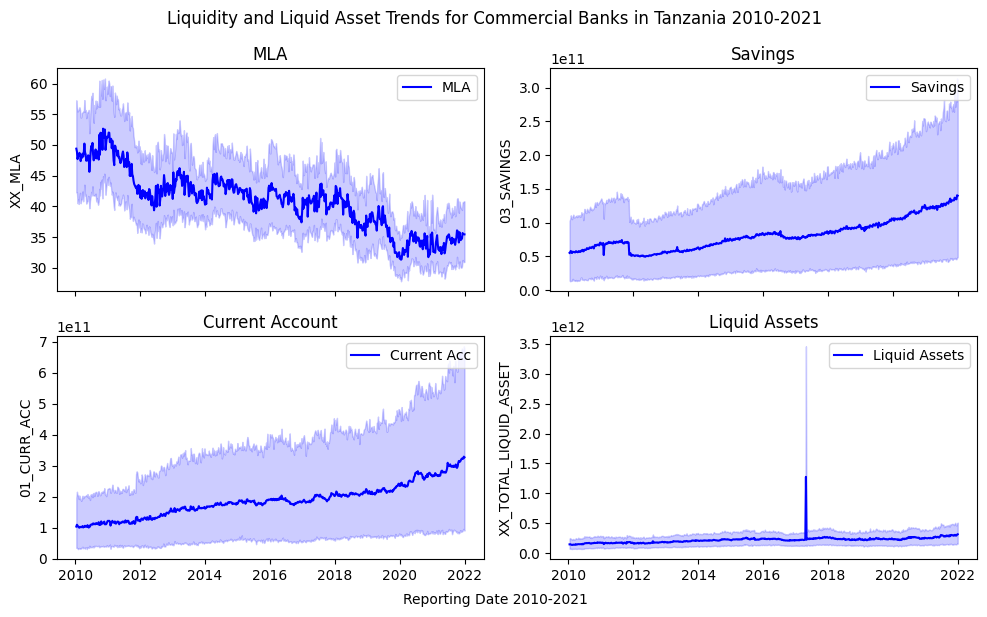

In [45]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,6))
fig.suptitle('Liquidity and Liquid Asset Trends for Commercial Banks in Tanzania 2010-2021')

fig.text(0.5, -0.01, 'Reporting Date 2010-2021', ha='center')

mask = (dfX_04['XX_MLA']<101)
sns.lineplot(ax=axes[0,0], x=dfX_04['REPORTINGDATE'],y=dfX_04[mask]['XX_MLA'], label="MLA", color='b').set(xlabel=None)
axes[0,0].set_title('MLA')

sns.lineplot(ax=axes[0,1],x=dfX_04['REPORTINGDATE'],y=dfX_04['03_SAVINGS'],label="Savings",color='b').set(xlabel=None)
axes[0,1].set_title('Savings')

sns.lineplot(ax=axes[1,0],x=dfX_04['REPORTINGDATE'],y=dfX_04['01_CURR_ACC'], label="Current Acc", color='b').set(xlabel=None)
axes[1,0].set_title('Current Account')

sns.lineplot(ax=axes[1,1],x=dfX_04['REPORTINGDATE'],y=dfX_04['XX_TOTAL_LIQUID_ASSET'], label="Liquid Assets", color='b').set(xlabel=None)
axes[1,1].set_title('Liquid Assets')


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Add space between the title and the plots
plt.tight_layout()

#axes[2,1].set_ylabels('MLA', size = 12)
plt.plot()

[]

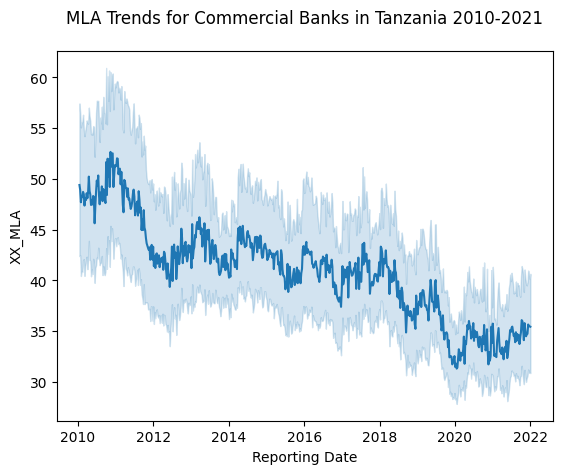

In [46]:
#General trends of MLA
mask = (dfX_04['XX_MLA']<101)
sns.lineplot(x=dfX_04['REPORTINGDATE'],y=dfX_04[mask]['XX_MLA'])
plt.xlabel('Reporting Date')
plt.title('MLA Trends for Commercial Banks in Tanzania 2010-2021', pad=20)
plt.plot()
#General decrease in MLA levels overtime for all banks. With structure breaks in 2016 and 2019
#2016 attributed to government contractionary policies to reduce government deposits in commercial banks 

[]

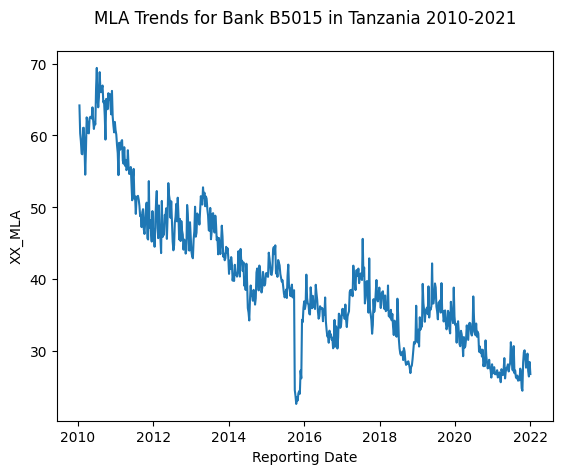

In [47]:

mask = (dfX_04['INSTITUTIONCODE']=='B5015')
sns.lineplot(x=dfX_04[mask]['REPORTINGDATE'],y=dfX_04[mask]['XX_MLA']) 
#on of bigg bank, a sharp decrease in liquidity for 2 big banks caused and in other banks as caused by contractionary liquidity policies of government
plt.xlabel('Reporting Date')
plt.title('MLA Trends for Bank B5015 in Tanzania 2010-2021', pad=20)
plt.plot()

[]

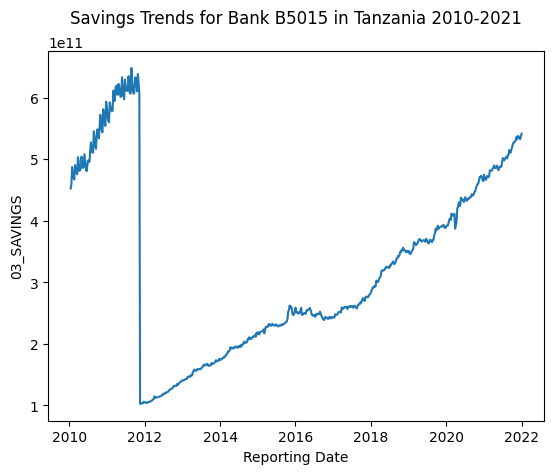

In [48]:

mask = (dfX_04['INSTITUTIONCODE']=='B5015')
sns.lineplot(x=dfX_04[mask]['REPORTINGDATE'],y=dfX_04[mask]['03_SAVINGS']) 
plt.xlabel('Reporting Date')
plt.title('Savings Trends for Bank B5015 in Tanzania 2010-2021', pad=20)
plt.plot()

[]

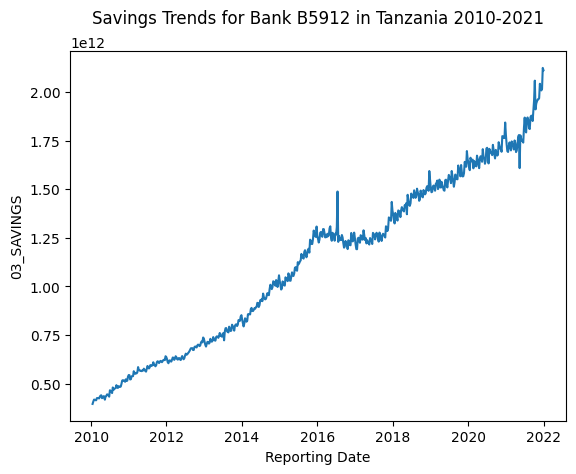

In [49]:

mask = (dfX_04['INSTITUTIONCODE']=='B5912')
sns.lineplot(x=dfX_04[mask]['REPORTINGDATE'],y=dfX_04[mask]['03_SAVINGS']) 
plt.xlabel('Reporting Date')
plt.title('Savings Trends for Bank B5912 in Tanzania 2010-2021', pad=20)
plt.plot()

[]

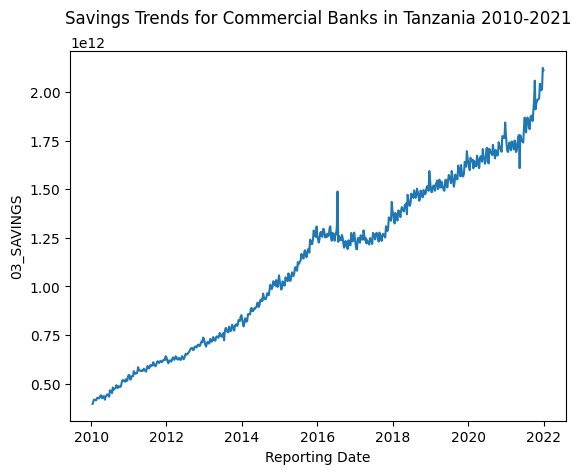

In [50]:
sns.lineplot(x=dfX_04[mask]['REPORTINGDATE'],y=dfX_04['03_SAVINGS']) #ALL
plt.xlabel('Reporting Date')
plt.title('Savings Trends for Commercial Banks in Tanzania 2010-2021', pad=20)
plt.plot()

[]

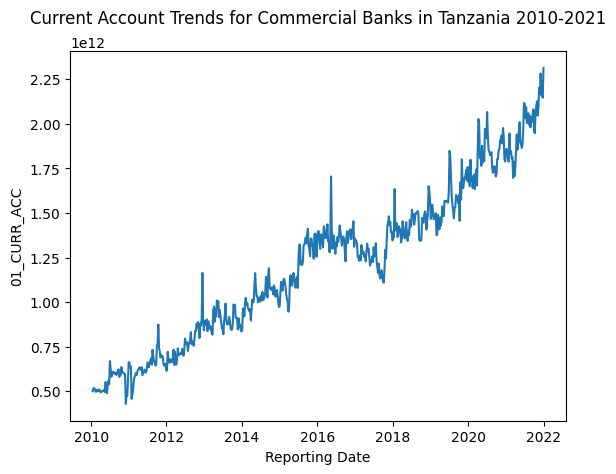

In [51]:
sns.lineplot(x=dfX_04[mask]['REPORTINGDATE'],y=dfX_04['01_CURR_ACC']) #ALL
plt.xlabel('Reporting Date')
plt.title('Current Account Trends for Commercial Banks in Tanzania 2010-2021', pad=20)
plt.plot()

[]

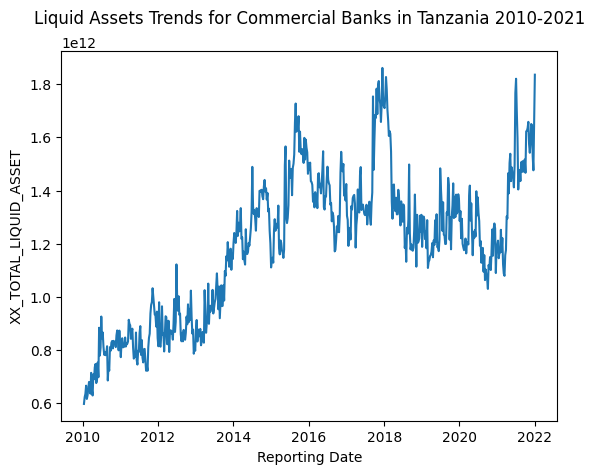

In [52]:
sns.lineplot(x=dfX_04[mask]['REPORTINGDATE'],y=dfX_04['XX_TOTAL_LIQUID_ASSET']) #ALL
plt.xlabel('Reporting Date')
plt.title('Liquid Assets Trends for Commercial Banks in Tanzania 2010-2021', pad=20)
plt.plot()

[]

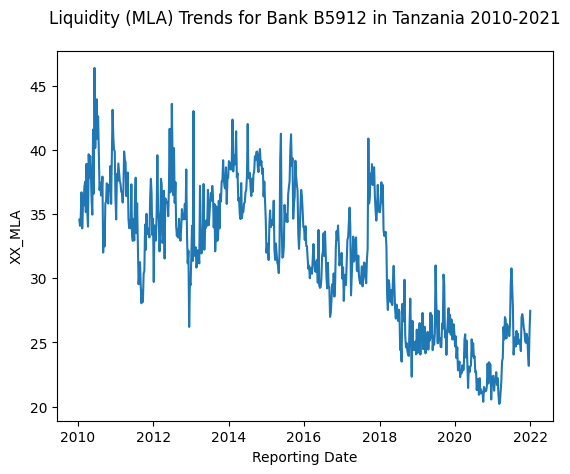

In [53]:
mask = (dfX_04['INSTITUTIONCODE']=='B5912')
sns.lineplot(x=dfX_04[mask]['REPORTINGDATE'],y=dfX_04[mask]['XX_MLA']) 
plt.xlabel('Reporting Date')
plt.title('Liquidity (MLA) Trends for Bank B5912 in Tanzania 2010-2021', pad=20)
plt.plot()

[]

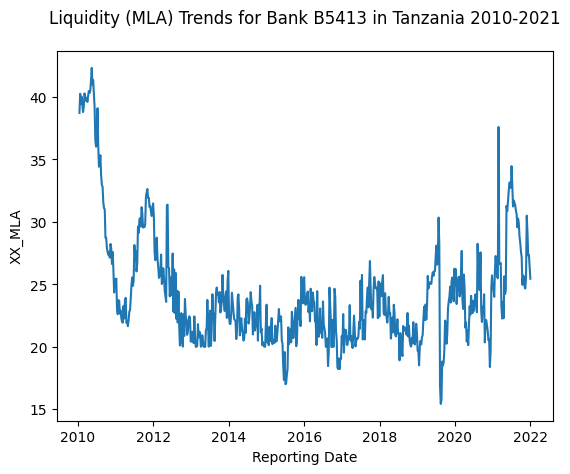

In [54]:
mask = (dfX_04['INSTITUTIONCODE']=='B5413')
sns.lineplot(x=dfX_04[mask]['REPORTINGDATE'],y=dfX_04[mask]['XX_MLA']) 
plt.xlabel('Reporting Date')
plt.title('Liquidity (MLA) Trends for Bank B5413 in Tanzania 2010-2021', pad=20)
plt.plot()

In [55]:
dfX_04['INSTITUTIONCODE'].unique()

array(['B5014', 'B5015', 'B5016', 'B5018', 'B5114', 'B5115', 'B5116',
       'B5117', 'B5120', 'B5213', 'B5215', 'B5216', 'B5219', 'B5318',
       'B5319', 'B5412', 'B5413', 'B5417', 'B5418', 'B5512', 'B5515',
       'B5516', 'B5613', 'B5619', 'B5716', 'B5717', 'B5719', 'B5812',
       'B5813', 'B5814', 'B5815', 'B5818', 'B5912', 'B5913', 'B5914',
       'B5916', 'B5917', 'B5919'], dtype=object)

#### Interpolation of Missing Values using Cubic Interpolation

In [56]:
#dfX_05.head()

In [57]:
#Interpolate intemediary data for individual institutions  
#Note to customize idx within time of institutional data availability  
#interpolated missing values using cubic method

dfX_05 = pd.DataFrame()
for i in range(len(instCodes)):
  maskx= (dfX_03['INSTITUTIONCODE']==instCodes[i])
  dt = pd.date_range(dfX_03[maskx]['REPORTINGDATE'].min(),dfX_03[maskx]['REPORTINGDATE'].max(),freq='W-FRI')
  idx = pd.DatetimeIndex(dt)
  dfX_05_tmp = dfX_04[(dfX_04['INSTITUTIONCODE']==instCodes[i])]     
  dfX_05_tmp.set_index('REPORTINGDATE', inplace=True)
  dfX_05_tmp = dfX_05_tmp.reindex(idx)
  dfX_05_tmp['INSTITUTIONCODE']=dfX_05_tmp['INSTITUTIONCODE'].apply(lambda x: x  if x==instCodes[i] else instCodes[i])
  dfX_05_tmp['01_CURR_ACC'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['02_TIME_DEPOSIT'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['03_SAVINGS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['04_OTHER_DEPOSITS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['05_BANKS_DEPOSITS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['06_BORROWING_FROM_PUBLIC'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['07_INTERBANKS_LOAN_PAYABLE'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['08_CHEQUES_ISSUED'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['09_PAY_ORDERS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['10_FOREIGN_DEPOSITS_AND_BORROWINGS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['11_OFF_BALSHEET_COMMITMENTS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['12_OTHER_LIABILITIES'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['13_CASH'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['14_CURRENT_ACC'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['15_SMR_ACC'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['16_FOREIGN CURRENCY'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['17_OTHER DEPOSITS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['18_BANKS_TZ'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['19_BANKS_ABROAD'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['20_CHEQUES_ITEMS_FOR_CLEARING'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['21_INTERBANK_LOANS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['22_TREASURY_BILLS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['23_OTHER_GOV_SECURITIES'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['24_FOREIGN_CURRENCY'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['25_COMMERCIAL_BILLS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['26_PROMISSORY_NOTES'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['XX_CUSTOMER_DEPOSITS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['XX_TOTAL_LIQUID_ASSET'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['XX_BOT_BALANCE'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['XX_BAL_IN_OTHER_BANKS'].interpolate(method='cubic', inplace=True)
  dfX_05_tmp['XX_MLA'].interpolate(method='cubic', inplace=True)
  x = dfX_05_tmp.isna().any().sum()
  if x > 0:
    print("{}:{}".format(x,instCodes[i]))
    print(dfX_05_tmp.info())
  dfX_05_tmp.reset_index(inplace=True)
  dfX_05_tmp.rename(columns={'index':'REPORTINGDATE'}, inplace=True)
  #dfX_05_tmp2=dfX_05_tmp.index_reset()
  dfX_05 = pd.concat([dfX_05, dfX_05_tmp], axis=0)

1:B5117
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 625 entries, 2010-01-15 to 2021-12-31
Freq: W-FRI
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   INSTITUTIONCODE                     625 non-null    object 
 1   01_CURR_ACC                         625 non-null    float64
 2   02_TIME_DEPOSIT                     625 non-null    float64
 3   03_SAVINGS                          625 non-null    float64
 4   04_OTHER_DEPOSITS                   625 non-null    float64
 5   05_BANKS_DEPOSITS                   625 non-null    float64
 6   06_BORROWING_FROM_PUBLIC            625 non-null    float64
 7   07_INTERBANKS_LOAN_PAYABLE          625 non-null    float64
 8   08_CHEQUES_ISSUED                   625 non-null    float64
 9   09_PAY_ORDERS                       625 non-null    float64
 10  10_FOREIGN_DEPOSITS_AND_BORROWINGS  625 non-null    float64
 11  11_OFF

In [58]:
#check shape of resulting dataset
dfX_05.shape  #(31621, 32)

(20356, 34)

In [59]:
#check shape of individual banks with varied years of licensing date eg B5919 (year 2018) had 200+ records, B5015/B5115 (prior to 2010) had 650 records
dfX_05[dfX_05['INSTITUTIONCODE']=='B5115'].shape

(625, 34)

In [60]:
dfX_05.info()   #checked existance of null variables and data types in a dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20356 entries, 0 to 203
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   REPORTINGDATE                       20356 non-null  datetime64[ns]
 1   INSTITUTIONCODE                     20356 non-null  object        
 2   01_CURR_ACC                         20356 non-null  float64       
 3   02_TIME_DEPOSIT                     20356 non-null  float64       
 4   03_SAVINGS                          20356 non-null  float64       
 5   04_OTHER_DEPOSITS                   20356 non-null  float64       
 6   05_BANKS_DEPOSITS                   20356 non-null  float64       
 7   06_BORROWING_FROM_PUBLIC            20356 non-null  float64       
 8   07_INTERBANKS_LOAN_PAYABLE          20356 non-null  float64       
 9   08_CHEQUES_ISSUED                   20356 non-null  float64       
 10  09_PAY_ORDERS           

In [61]:
dfX_05[dfX_05['INSTITUTIONCODE']=='B5015'].tail(100)

,REPORTINGDATE,INSTITUTIONCODE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,...,23_OTHER_GOV_SECURITIES,24_FOREIGN_CURRENCY,25_COMMERCIAL_BILLS,26_PROMISSORY_NOTES,XX_CUSTOMER_DEPOSITS,XX_TOTAL_LIQUID_LIAB,XX_BOT_BALANCE,XX_BAL_IN_OTHER_BANKS,XX_TOTAL_LIQUID_ASSET,XX_MLA
525,2020-02-07,B5015,3.371484e+12,7.091465e+11,4.038332e+11,1.518320e+10,3.497798e+10,2.339600e+10,0.0,2.139267e+09,...,7.642372e+10,8.532990e+10,0.0,0.0,4.499647e+12,5.796606e+12,7.201963e+11,1.652406e+11,1.884894e+12,32.517197
526,2020-02-14,B5015,3.292357e+12,7.071999e+11,4.018065e+11,1.838274e+10,3.609304e+10,2.339600e+10,0.0,2.140576e+09,...,7.697711e+10,8.467006e+10,0.0,0.0,4.419746e+12,5.684317e+12,6.453912e+11,1.177990e+11,1.761620e+12,30.990880
527,2020-02-21,B5015,3.297697e+12,7.129204e+11,4.116201e+11,2.039038e+10,3.382433e+10,2.339600e+10,0.0,2.137438e+09,...,8.733347e+10,9.295625e+10,0.0,0.0,4.442628e+12,5.684013e+12,6.212183e+11,1.711411e+11,1.744915e+12,30.698651
528,2020-02-28,B5015,3.403042e+12,7.146044e+11,4.086609e+11,2.021922e+10,3.614952e+10,2.339600e+10,0.0,2.138100e+09,...,8.767366e+10,9.000554e+10,0.0,0.0,4.546527e+12,5.804585e+12,6.211471e+11,1.759252e+11,1.906497e+12,32.844679
529,2020-03-06,B5015,3.364332e+12,7.187324e+11,4.093897e+11,1.683893e+10,3.311182e+10,2.339600e+10,0.0,2.131157e+09,...,8.801448e+10,8.741332e+10,0.0,0.0,4.509293e+12,5.740299e+12,7.161581e+11,1.750888e+11,1.857158e+12,32.352989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,2021-12-03,B5015,4.551049e+12,7.842080e+11,5.373510e+11,4.596375e+10,5.232825e+10,8.334919e+10,0.0,2.205816e+09,...,1.732500e+11,9.562186e+10,0.0,0.0,5.918572e+12,8.067021e+12,1.206992e+12,1.219326e+11,2.393736e+12,29.673106
621,2021-12-10,B5015,4.555500e+12,7.773398e+11,5.348382e+11,4.527708e+10,4.714661e+10,8.334919e+10,0.0,2.207343e+09,...,1.732500e+11,1.107238e+11,0.0,0.0,5.912955e+12,8.103185e+12,1.056118e+12,1.380470e+11,2.207558e+12,27.243095
622,2021-12-17,B5015,4.497405e+12,7.961839e+11,5.324405e+11,4.561951e+10,4.773651e+10,8.334919e+10,0.0,2.182869e+09,...,1.732500e+11,9.902746e+10,0.0,0.0,5.871649e+12,8.074731e+12,1.071418e+12,3.805904e+10,2.139351e+12,26.494393
623,2021-12-24,B5015,4.812644e+12,7.878179e+11,5.367820e+11,4.465951e+10,4.702318e+10,8.334919e+10,0.0,2.182983e+09,...,1.732500e+11,8.939329e+10,0.0,0.0,6.181904e+12,8.386474e+12,1.359462e+12,3.405568e+10,2.391335e+12,28.514182


In [62]:
#Variable labeling: Already done during anonymisation   
dfX_05.to_csv(config.file5_II)
dfX_06 = pd.read_csv(config.file5_II, parse_dates=["REPORTINGDATE"])
unnamedCols2 = [col for col in dfX_06.columns if 'Unnamed' in str(col)]
dfX_06.drop(columns=unnamedCols2, inplace=True)

banks = pd.read_csv(config.file6)
unnamedCols2 = [col for col in banks.columns if 'Unnamed' in str(col)]
banks.drop(columns=unnamedCols2, inplace=True)

In [63]:
def encode(initialCode):
  mask =  banks['INSTITUTIONCODE']==initialCode
  return banks[mask]['INSTITUTIONCODE2'].values[0]
   

In [64]:
#
banks[['INSTITUTIONCODE','INSTITUTIONCODE2']]

,INSTITUTIONCODE,INSTITUTIONCODE2
0,B5114,B5114
1,B5815,B5815
2,B5412,B5412
3,B5512,B5512
4,B5812,B5812
5,B5912,B5912
6,B5213,B5213
7,B5413,B5413
8,B5613,B5613
9,B5813,B5813


In [65]:
# save 
dfX_06.to_csv(config.file7)
dfX_07 = pd.read_csv(config.file7, parse_dates=["REPORTINGDATE"])
unnamedCols2 = [col for col in dfX_07.columns if 'Unnamed' in str(col)]
dfX_07.drop(columns=unnamedCols2, inplace=True)

In [66]:
dfX_07.head(3)

,REPORTINGDATE,INSTITUTIONCODE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,...,23_OTHER_GOV_SECURITIES,24_FOREIGN_CURRENCY,25_COMMERCIAL_BILLS,26_PROMISSORY_NOTES,XX_CUSTOMER_DEPOSITS,XX_TOTAL_LIQUID_LIAB,XX_BOT_BALANCE,XX_BAL_IN_OTHER_BANKS,XX_TOTAL_LIQUID_ASSET,XX_MLA
0,2010-01-15,B5014,3.991095e+10,8.525043e+09,1.795650e+10,1052155.45,0.0,0.0,1.557078e+09,1.981911e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.639354e+10,8.420213e+10,1.606975e+10,6.288819e+09,7.372711e+10,87.559671
1,2010-01-22,B5014,4.080184e+10,8.560163e+09,1.811616e+10,1052155.45,0.0,0.0,1.533282e+09,2.553601e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.747921e+10,8.635932e+10,1.606975e+10,6.288819e+09,7.372711e+10,85.372502
2,2010-01-29,B5014,3.765654e+10,7.780012e+09,2.009096e+10,1052155.45,0.0,0.0,1.499455e+09,1.779066e+08,...,0.0,0.0,3.383128e+09,1.071797e+08,6.552856e+10,8.412260e+10,1.606975e+10,6.288819e+09,7.372711e+10,87.642449


#### Building Monthly Dataset and Interpolation into Weekly Dataset

In [67]:
#interpolate missing columns from monthly data
# dfX_monthly = pd.read_csv(dataWbook,parse_dates=["BSH_REPORTINGDATE"])
# unnamedCols2 = [col for col in dfX_monthly.columns if 'Unnamed' in str(col)]
# dfX_monthly.drop(columns=unnamedCols2, inplace=True)
# dfX_monthly.shape

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # interpolate missing columns from monthly data
    dfX_monthly = pd.read_csv(config.dataWbook, parse_dates=["BSH_REPORTINGDATE"])
    unnamedCols2 = [col for col in dfX_monthly.columns if 'Unnamed' in str(col)]
    dfX_monthly.drop(columns=unnamedCols2, inplace=True)

# Warnings are suppressed within the context manager
dfX_monthly.shape

(4693, 242)

In [68]:
#dfX_monthly.columns
[col for col in dfX_monthly.columns if 'MLA' in str(col)]

['MLA', 'MLA_CLASS']

In [69]:
#
dfX_monthly.head(2)

,INSTITUTIONCODE,BSH_REPORTINGDATE,F001_ASSET_CASH,F002_ASSET_BAL_BOT,F003_ASSET_BAL_BOT_SMR,F004_ASSET_BAL_BOT_CURRENT_ACCOUNT,F005_ASSET_BAL_BOT_OTHERS,F006_ASSET_BAL_OTHER_BANKS,F007_ASSET_BAL_OTHER_BANKS_TZ,F008_ASSET_BAL_OTHER_BANKS_ABROAD,...,EWAQ_Capital,EWAQ_NPL,EWAQ_GrossLoans,EWAQ_LargeExposures,EWAQ_NPLsNetOfProvisions,EWAQ_NPLsNetOfProvisions2CoreCapital,EWAQ_NPLs2GrossLoans,EWAQ_AssetsQualityRating,EWAQ_Loans,MLA_CLASS
0,B5412,2010-01-31,9.570422e+09,5.260077e+10,3.700000e+10,1.560077e+10,0.0,1.348740e+11,1.622160e+10,1.186520e+11,...,9.514540e+10,1.951219e+09,1.274810e+11,7.137633e+10,903220975.0,0.0095,0.0153,1.0,NaN,high
1,B5412,2010-02-28,6.996645e+09,3.554718e+10,3.200000e+10,3.547185e+09,0.0,1.482240e+11,7.535208e+08,1.474710e+11,...,9.595342e+10,1.954516e+09,1.251520e+11,7.831967e+10,904869349.0,0.0094,0.0156,1.0,NaN,high


In [70]:
#Interpolate to weekly
maskx= (dfX_03['INSTITUTIONCODE']=='B5919')
#dt = pd.date_range("15-01-2010","31-12-2021",freq='W-FRI')
dt = pd.date_range(dfX_03[maskx]['REPORTINGDATE'].min(),dfX_03[maskx]['REPORTINGDATE'].max(),freq='W-FRI')
#dt1 = pd.date_range("15-01-2010","31-12-2021",freq='M')
dt1 = pd.date_range(dfX_03[maskx]['REPORTINGDATE'].min(),dfX_03[maskx]['REPORTINGDATE'].max(),freq='M')
arr_dt = np.array(dt)
arr_dt1 = np.array(dt1)
dt_combined = np.append(dt, dt1)
dt_combined = np.sort(dt_combined)


In [71]:
#
dt_combined

array(['2018-02-09T00:00:00.000000000', '2018-02-16T00:00:00.000000000',
       '2018-02-23T00:00:00.000000000', '2018-02-28T00:00:00.000000000',
       '2018-03-02T00:00:00.000000000', '2018-03-09T00:00:00.000000000',
       '2018-03-16T00:00:00.000000000', '2018-03-23T00:00:00.000000000',
       '2018-03-30T00:00:00.000000000', '2018-03-31T00:00:00.000000000',
       '2018-04-06T00:00:00.000000000', '2018-04-13T00:00:00.000000000',
       '2018-04-20T00:00:00.000000000', '2018-04-27T00:00:00.000000000',
       '2018-04-30T00:00:00.000000000', '2018-05-04T00:00:00.000000000',
       '2018-05-11T00:00:00.000000000', '2018-05-18T00:00:00.000000000',
       '2018-05-25T00:00:00.000000000', '2018-05-31T00:00:00.000000000',
       '2018-06-01T00:00:00.000000000', '2018-06-08T00:00:00.000000000',
       '2018-06-15T00:00:00.000000000', '2018-06-22T00:00:00.000000000',
       '2018-06-29T00:00:00.000000000', '2018-06-30T00:00:00.000000000',
       '2018-07-06T00:00:00.000000000', '2018-07-13

In [72]:
#
dfX_03[maskx]['REPORTINGDATE']

20143    2018-02-09
20144    2018-02-16
20145    2018-02-23
20146    2018-03-02
20147    2018-03-09
            ...    
20342    2021-12-03
20343    2021-12-10
20344    2021-12-17
20345    2021-12-24
20346    2021-12-31
Name: REPORTINGDATE, Length: 204, dtype: object

#### Generate missing dates of monthly data, add weekly dates, and interpolate missing data for all banks

In [73]:
#2.2 Filter columns
#  Generate missing dates of monthly data, add weekly dates, and interpolate missing data
#instCodes2A = list(dfX_monthly['INSTITUTIONCODE'].unique())
instCodes2A = list(banks['INSTITUTIONCODE'].values)
instCodes2B = list(banks['INSTITUTIONCODE2'].values)

dfX_monthly2 = dfX_monthly[['BSH_REPORTINGDATE','INSTITUTIONCODE','F077_ASSETS_TOTAL','F125_LIAB_TOTAL','EWAQ_GrossLoans','EWAQ_Capital',
                            'EWAQ_NPL','EWAQ_NPLsNetOfProvisions','EWAQ_NPLsNetOfProvisions2CoreCapital','INF','LR','DR','IBCM','GDP','EWL_LIQUIDITY RATING','MLA','MLA_CLASS']].copy()
dfX_monthly2.rename(columns={'BSH_REPORTINGDATE':'REPORTINGDATE'}, inplace=True)
idx = pd.DatetimeIndex(dt_combined)

#dfX_monthly_tmp = dfX_monthly2[(dfX_monthly2['INSTITUTIONCODE']=='B5919')]
#dt = pd.date_range(dfX_monthly2['REPORTINGDATE'].min(),dfX_monthly2['REPORTINGDATE'].max(),freq='W-FRI')
#dfX_monthly_tmp.set_index('REPORTINGDATE', inplace=True)

dfX_monthly_01 = pd.DataFrame()
num_rows = 0
for i in range(len(instCodes2A)):
    dfX_monthly_tmp = dfX_monthly2[((dfX_monthly2['INSTITUTIONCODE']==instCodes2A[i]) | (dfX_monthly2['INSTITUTIONCODE']==instCodes2B[i]))]
    dt = pd.date_range(dfX_monthly_tmp['REPORTINGDATE'].min(),dfX_monthly_tmp['REPORTINGDATE'].max(),freq='W-FRI')
    dt1 = pd.date_range(dfX_monthly_tmp['REPORTINGDATE'].min(),dfX_monthly_tmp['REPORTINGDATE'].max(),freq='M')

    dfX_monthly_tmp.set_index('REPORTINGDATE', inplace=True)
    #masky= (dfX_monthly2['INSTITUTIONCODE']==instCodes[i])
    arr_dt = np.array(dt)
    arr_dt1 = np.array(dt1)
    dt_combined = np.append(dt, dt1)
    dt_combined = np.sort(dt_combined)
    idx = pd.DatetimeIndex(dt_combined)
    dfX_monthly_tmp2 = dfX_monthly_tmp.reindex(idx)    
    dfX_monthly_tmp2.reset_index(inplace=True)
    dfX_monthly_tmp2.rename(columns={'index':'REPORTINGDATE'}, inplace=True)
    #['INSTITUTIONCODE'] = dfX_monthly_tmp2['INSTITUTIONCODE'].apply(lambda x: encodeBankNames(x))  #already encoded    
    dfX_monthly_tmp2['INSTITUTIONCODE'] = dfX_monthly_tmp2['INSTITUTIONCODE'].apply(lambda x: x  if x==instCodes2B[i] else instCodes2B[i])       
    dfX_monthly_tmp2['F077_ASSETS_TOTAL'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['F125_LIAB_TOTAL'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['EWAQ_GrossLoans'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['EWAQ_Capital'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['EWAQ_NPL'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['EWAQ_NPLsNetOfProvisions'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['EWAQ_NPLsNetOfProvisions2CoreCapital'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['INF'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['LR'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['DR'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['IBCM'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['GDP'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['MLA'].interpolate(method='cubic', inplace=True)
    dfX_monthly_tmp2['EWL_LIQUIDITY RATING'].interpolate(method='cubic', inplace=True) 
    #print("code is {}, shape is {}".format(instCodes2A[i] + " " + instCodes2B[i], dfX_monthly_tmp2.shape))   
    num_rows = num_rows +  dfX_monthly_tmp2.shape[0]
    dfX_monthly_01 = pd.concat([dfX_monthly_01, dfX_monthly_tmp2], axis=0)
    

In [74]:
#
num_rows #24945

24945

In [75]:
#
dfX_monthly_01['INSTITUTIONCODE'].unique()

array(['B5114', 'B5815', 'B5412', 'B5512', 'B5812', 'B5912', 'B5213',
       'B5413', 'B5613', 'B5813', 'B5913', 'B5014', 'B5814', 'B5914',
       'B5015', 'B5115', 'B5215', 'B5515', 'B5016', 'B5116', 'B5216',
       'B5516', 'B5716', 'B5916', 'B5117', 'B5417', 'B5717', 'B5917',
       'B5018', 'B5318', 'B5418', 'B5818', 'B5219', 'B5319', 'B5619',
       'B5719', 'B5919', 'B5120'], dtype=object)

In [76]:
#
#interpolate.interp1d(x, y, fill_value='extrapolate')
dfX_monthly_01.columns


Index(['REPORTINGDATE', 'INSTITUTIONCODE', 'F077_ASSETS_TOTAL',
       'F125_LIAB_TOTAL', 'EWAQ_GrossLoans', 'EWAQ_Capital', 'EWAQ_NPL',
       'EWAQ_NPLsNetOfProvisions', 'EWAQ_NPLsNetOfProvisions2CoreCapital',
       'INF', 'LR', 'DR', 'IBCM', 'GDP', 'EWL_LIQUIDITY RATING', 'MLA',
       'MLA_CLASS'],
      dtype='object')

In [77]:
#
dfX_monthly_01[(dfX_monthly_01['INSTITUTIONCODE']=='B5919')].head(5)

,REPORTINGDATE,INSTITUTIONCODE,F077_ASSETS_TOTAL,F125_LIAB_TOTAL,EWAQ_GrossLoans,EWAQ_Capital,EWAQ_NPL,EWAQ_NPLsNetOfProvisions,EWAQ_NPLsNetOfProvisions2CoreCapital,INF,LR,DR,IBCM,GDP,EWL_LIQUIDITY RATING,MLA,MLA_CLASS
0,2018-01-31,B5919,2.061371e+10,3.343995e+08,NaN,2.027931e+10,NaN,NaN,NaN,3.976667,18.036667,9.436667,3.403333,9.283333,2.000000,0.000000,incompliant
1,2018-02-02,B5919,1.967500e+10,-3.666485e+08,NaN,2.024881e+10,NaN,NaN,NaN,3.960527,18.019874,9.384712,3.322978,9.101989,2.406193,552.145945,NaN
2,2018-02-09,B5919,1.904161e+10,-8.043697e+08,NaN,2.013729e+10,NaN,NaN,NaN,3.951802,18.008285,9.337088,3.254429,8.920322,2.698361,955.872934,NaN
3,2018-02-16,B5919,1.867017e+10,-1.017160e+09,NaN,1.995921e+10,NaN,NaN,NaN,3.948814,18.000758,9.293109,3.195391,8.739660,2.887432,1228.634952,NaN
4,2018-02-23,B5919,1.851733e+10,-1.043417e+09,NaN,1.972905e+10,NaN,NaN,NaN,3.949884,17.996155,9.252086,3.143569,8.561332,2.984335,1387.885979,NaN


In [78]:
#!pip install IO

In [79]:
#
dfX_monthly_02 = dfX_monthly_01.copy()
dfX_monthly_02

,REPORTINGDATE,INSTITUTIONCODE,F077_ASSETS_TOTAL,F125_LIAB_TOTAL,EWAQ_GrossLoans,EWAQ_Capital,EWAQ_NPL,EWAQ_NPLsNetOfProvisions,EWAQ_NPLsNetOfProvisions2CoreCapital,INF,LR,DR,IBCM,GDP,EWL_LIQUIDITY RATING,MLA,MLA_CLASS
0,2010-01-31,B5114,7.491659e+10,6.251246e+10,4.215184e+10,1.120532e+10,3.433586e+09,2.757984e+09,2.461000e-01,11.173333,14.636667,6.296667,1.333333,6.153333,2.000000,43.700000,low
1,2010-02-05,B5114,7.585247e+10,6.344583e+10,4.233032e+10,1.110161e+10,3.410875e+09,2.702825e+09,2.433309e-01,10.973782,14.634353,6.275245,1.314727,6.178466,2.000000,43.755881,NaN
2,2010-02-12,B5114,7.636292e+10,6.394745e+10,4.245290e+10,1.107169e+10,3.370762e+09,2.640110e+09,2.383692e-01,10.765043,14.635804,6.250326,1.315636,6.113955,2.000000,43.604108,NaN
3,2010-02-19,B5114,7.652031e+10,6.409098e+10,4.253248e+10,1.109714e+10,3.318572e+09,2.573289e+09,2.319021e-01,10.549412,14.640078,6.222785,1.331181,5.982211,2.000000,43.285394,NaN
4,2010-02-26,B5114,7.639701e+10,6.395009e+10,4.258193e+10,1.115954e+10,3.259630e+09,2.505810e+09,2.246166e-01,10.329188,14.646235,6.193496,1.356484,5.805644,2.000000,42.840454,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2021-12-10,B5120,1.122348e+11,1.611589e+10,2.281590e+10,9.358462e+10,4.313267e+04,-3.283309e+06,-1.539192e-06,4.153148,16.378916,7.714440,3.862822,4.849991,4.420771,62.088944,NaN
190,2021-12-17,B5120,1.119070e+11,1.576893e+10,2.279875e+10,9.345756e+10,3.234950e+04,-3.130693e+06,-1.154394e-06,4.174861,16.384187,7.777324,3.947820,4.852838,4.665579,60.443708,NaN
191,2021-12-24,B5120,1.116169e+11,1.546803e+10,2.279028e+10,9.334656e+10,1.437756e+04,-3.002267e+06,-5.130641e-07,4.191049,16.392972,7.833430,4.020971,4.851768,4.873590,59.077648,NaN
192,2021-12-31,B5120,1.114360e+11,1.528278e+10,2.278753e+10,9.327792e+10,0.000000e+00,-2.924714e+06,0.000000e+00,4.200000,16.400000,7.868574,4.065789,4.849750,5.000000,58.260000,high


#### Extrapolation of values that are outside the range

In [80]:
#2.4 indexing 
# Temporarily remove dates and make index numeric
#source:https://itecnote.com/tecnote/python-extrapolate-pandas-dataframe/
# df = dfX_monthly_01[['F077_ASSETS_TOTAL',
#        'F125_LIAB_TOTAL', 'EWAQ_GrossLoans', 'EWAQ_Capital', 'EWAQ_NPL',
#        'EWAQ_NPLsNetOfProvisions', 'EWAQ_NPLsNetOfProvisions2CoreCapital',
#        'LR', 'DR', 'IBCM', 'GDP','INF', 'EWL_LIQUIDITY RATING','MLA']].copy() 
# di = df.index
# df = df.reset_index().drop('index', 1)


df = dfX_monthly_01[['F077_ASSETS_TOTAL',
       'F125_LIAB_TOTAL', 'EWAQ_GrossLoans', 'EWAQ_Capital', 'EWAQ_NPL',
       'EWAQ_NPLsNetOfProvisions', 'EWAQ_NPLsNetOfProvisions2CoreCapital',
       'LR', 'DR', 'IBCM', 'GDP','INF', 'EWL_LIQUIDITY RATING','MLA']].copy() 
di = df.index
df = df.reset_index(drop=True)

In [81]:
#
#from scipy.optimize import curve_fit
# Function to curve fit to the data
def func(x, a, b, c, d):
    return a * (x ** 3) + b * (x ** 2) + c * x + d

# Initial parameter guess, just to kick off the optimization
guess = (0.5, 0.5, 0.5, 0.5)
fit_df = df.dropna()
# Place to store function parameters for each column
col_params = {}

# Curve fit each column
for col in fit_df.columns:
    # Get x & y
    x = fit_df.index.astype(float).values
    y = fit_df[col].values
    # Curve fit column and get curve parameters
    params = curve_fit(func, x, y, guess)
    # Store optimized parameters
    col_params[col] = params[0]

# Extrapolate each column
for col in df.columns:
    # Get the index values for NaNs in the column
    x = df[pd.isnull(df[col])].index.astype(float).values
    # Extrapolate those points with the fitted function
    df[col][x] = func(x, *col_params[col])

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [82]:
#68
# Put date index back
df.index = di



In [83]:
#69
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24945 entries, 0 to 193
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   F077_ASSETS_TOTAL                     24945 non-null  float64
 1   F125_LIAB_TOTAL                       24945 non-null  float64
 2   EWAQ_GrossLoans                       24945 non-null  float64
 3   EWAQ_Capital                          24945 non-null  float64
 4   EWAQ_NPL                              24945 non-null  float64
 5   EWAQ_NPLsNetOfProvisions              24945 non-null  float64
 6   EWAQ_NPLsNetOfProvisions2CoreCapital  24945 non-null  float64
 7   LR                                    24945 non-null  float64
 8   DR                                    24945 non-null  float64
 9   IBCM                                  24945 non-null  float64
 10  GDP                                   24945 non-null  float64
 11  INF              

In [84]:
#70
#info and check null variables
dfX_monthly_03 = df.copy()
dfX_monthly_03[['REPORTINGDATE','INSTITUTIONCODE']]=dfX_monthly_01[['REPORTINGDATE','INSTITUTIONCODE']]

In [85]:
#
#2.5 extrapolated values
dfX_monthly_03 = dfX_monthly_03[['REPORTINGDATE','INSTITUTIONCODE','F077_ASSETS_TOTAL',
       'F125_LIAB_TOTAL', 'EWAQ_GrossLoans', 'EWAQ_Capital', 'EWAQ_NPL',
       'EWAQ_NPLsNetOfProvisions', 'EWAQ_NPLsNetOfProvisions2CoreCapital',
       'LR', 'DR', 'IBCM', 'GDP', 'INF','EWL_LIQUIDITY RATING','MLA']]

In [86]:
#
#check if extrapolated values donot have null values
dfX_monthly_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24945 entries, 0 to 193
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   REPORTINGDATE                         24945 non-null  datetime64[ns]
 1   INSTITUTIONCODE                       24945 non-null  object        
 2   F077_ASSETS_TOTAL                     24945 non-null  float64       
 3   F125_LIAB_TOTAL                       24945 non-null  float64       
 4   EWAQ_GrossLoans                       24945 non-null  float64       
 5   EWAQ_Capital                          24945 non-null  float64       
 6   EWAQ_NPL                              24945 non-null  float64       
 7   EWAQ_NPLsNetOfProvisions              24945 non-null  float64       
 8   EWAQ_NPLsNetOfProvisions2CoreCapital  24945 non-null  float64       
 9   LR                                    24945 non-null  float64       
 10  

In [87]:
#73
#interpolated and extrapolated
dfX_monthly_03.to_csv(config.file7i)

#### Join Weekly with Monthly In Weekly Format

In [88]:
dfX_08 = pd.merge(dfX_07, dfX_monthly_03, how="left", on=["REPORTINGDATE","INSTITUTIONCODE"])

In [89]:
#check columns with NAN
column_with_nan = dfX_08.columns[dfX_08.isnull().any()]
for column in column_with_nan:
    print(column, dfX_08[column].isnull().sum())

XX_TOTAL_LIQUID_LIAB 25
F077_ASSETS_TOTAL 106
F125_LIAB_TOTAL 106
EWAQ_GrossLoans 106
EWAQ_Capital 106
EWAQ_NPL 106
EWAQ_NPLsNetOfProvisions 106
EWAQ_NPLsNetOfProvisions2CoreCapital 106
LR 106
DR 106
IBCM 106
GDP 106
INF 106
EWL_LIQUIDITY RATING 106
MLA 106


In [90]:
#Export data with null variables for analysis
dfX_08[dfX_08.isnull().any(axis=1)].to_csv(config.null_empty_for_analysis)

#### EDA For Sampled Banks

In [91]:
#79
maskz = (dfX_08['INSTITUTIONCODE'] == 'B5015') 
dfX_08[maskz].shape  #(645, 44)

(645, 48)

In [92]:
#80
maskz = (dfX_08['INSTITUTIONCODE'] == 'B5115') 
dfX_08[maskz].shape  #(645, 44) 

(645, 48)

In [93]:
#81
maskz = (dfX_08['INSTITUTIONCODE'] == 'B5919') 
dfX_08[maskz].shape  #(211, 44) 

(211, 48)

In [94]:
#82
maskz = (dfX_08['INSTITUTIONCODE'] == 'B5014') 
dfX_08[maskz].shape  #(645, 44)

(645, 48)

In [95]:
#83
mask_sampled_banks = ((dfX_08['INSTITUTIONCODE'] == 'B5015') | 
                      (dfX_08['INSTITUTIONCODE'] == 'B5115') |  
                       (dfX_08['INSTITUTIONCODE'] == 'B5919') |
                       (dfX_08['INSTITUTIONCODE'] == 'B5014')  )
dfX_08[mask_sampled_banks].shape 

(2146, 48)

In [96]:
#84
dfX_08_4banks = dfX_08[mask_sampled_banks].dropna()

In [97]:
#85
#dfX_08_4banks.isna().sum()
dfX_08_4banks['EWL_LIQUIDITY RATING'].unique()

array([1.        , 1.        , 1.        , ..., 0.90330086, 0.92747564,
       0.96776695])

In [98]:
#86
dfX_08_4banks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 3 to 21008
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   REPORTINGDATE                         2137 non-null   datetime64[ns]
 1   INSTITUTIONCODE                       2137 non-null   object        
 2   01_CURR_ACC                           2137 non-null   float64       
 3   02_TIME_DEPOSIT                       2137 non-null   float64       
 4   03_SAVINGS                            2137 non-null   float64       
 5   04_OTHER_DEPOSITS                     2137 non-null   float64       
 6   05_BANKS_DEPOSITS                     2137 non-null   float64       
 7   06_BORROWING_FROM_PUBLIC              2137 non-null   float64       
 8   07_INTERBANKS_LOAN_PAYABLE            2137 non-null   float64       
 9   08_CHEQUES_ISSUED                     2137 non-null   float64       
 10 

In [99]:
#87
dfX_09 = dfX_08.dropna()


In [100]:
#88
#check if MLA values from weekly (calculated) and monthly (interpolated) are close to eath other
dfX_09[['XX_MLA','MLA']]

,XX_MLA,MLA
3,86.898135,87.310386
4,89.545334,86.710114
5,90.997005,85.868650
6,83.580184,84.815457
7,80.905077,82.191743
...,...,...
21004,52.676231,49.245268
21005,61.124212,53.017951
21006,61.384902,56.217756
21007,58.155715,58.160000


In [101]:
#89
dfX_09['EWL_LIQUIDITY RATING'] = dfX_09['EWL_LIQUIDITY RATING'].apply(lambda x: int(x))

/tmp/ipykernel_36/763080411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfX_09['EWL_LIQUIDITY RATING'] = dfX_09['EWL_LIQUIDITY RATING'].apply(lambda x: int(x))


In [102]:
#90
dfX_09['EWL_LIQUIDITY RATING'].unique()

array([0, 1, 2, 3, 4, 5])

In [103]:
#91
dfX_09['EWL_LIQUIDITY RATING'].shape #(20903,)

(20878,)

In [104]:
#92
#dfX_08 = pd.merge(dfX_07, dfX_monthly_03, how="left", on=["REPORTINGDATE","INSTITUTIONCODE"])
#dfX_monthly_01[["REPORTINGDATE","INSTITUTIONCODE"]]

In [105]:
#93
#dfX_08.shape  #(38750, 44)
#dfX_07.shape  #(38750, 44)
#dfX_monthly_01.shape #(29222, 14)

#### Classifying banks in MLA Classes of Liquidity Risk Ratings 1 to 5 adopted from Banking Supervision Manual

In [106]:
#94
#convert XX_MLA into classes 
mlaValue = 0
def getMlaClass(mlaValue):
    mlaClass = 1
    if mlaValue > 40:
        mlaClass = 1
    elif  ((mlaValue >  30) and (mlaValue <=  40)):
        mlaClass = 2
    elif  ((mlaValue >  20) and (mlaValue <=  30)):
        mlaClass = 3
    elif  ((mlaValue >  15) and (mlaValue <=  20)):
        mlaClass = 4
    elif  (mlaValue <=  15):
        mlaClass = 5
    #elif  (mlaValue <=  0.20):
    #  mlaClass = 4
    return mlaClass

dfX_09['MLA_CLASS2'] = dfX_09['MLA'].apply(lambda x: getMlaClass(x))
dfX_09['XX_MLA_CLASS2'] = dfX_09['XX_MLA'].apply(lambda x: getMlaClass(x))

/tmp/ipykernel_36/847011608.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfX_09['MLA_CLASS2'] = dfX_09['MLA'].apply(lambda x: getMlaClass(x))
/tmp/ipykernel_36/847011608.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfX_09['XX_MLA_CLASS2'] = dfX_09['XX_MLA'].apply(lambda x: getMlaClass(x))


In [107]:
dfX_09.head()

,REPORTINGDATE,INSTITUTIONCODE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,...,EWAQ_NPLsNetOfProvisions2CoreCapital,LR,DR,IBCM,GDP,INF,EWL_LIQUIDITY RATING,MLA,MLA_CLASS2,XX_MLA_CLASS2
3,2010-02-05,B5014,4.358491e+10,7.636494e+09,1.834680e+10,1052155.45,0.0,0.0,1.486844e+09,7.642781e+07,...,0.000003,14.634353,6.275245,1.314727,6.178466,10.973782,0,87.310386,1,1
4,2010-02-12,B5014,4.198509e+10,7.603740e+09,1.827224e+10,1052155.45,0.0,0.0,1.669462e+09,8.905947e+07,...,0.000004,14.635804,6.250326,1.315636,6.113955,10.765043,1,86.710114,1,1
5,2010-02-19,B5014,4.139788e+10,7.647355e+09,1.785701e+10,1052155.45,0.0,0.0,1.839116e+09,1.335379e+08,...,0.000004,14.640078,6.222785,1.331181,5.982211,10.549412,1,85.868650,1,1
6,2010-02-26,B5014,4.083612e+10,8.152346e+09,1.859316e+10,1052155.45,0.0,0.0,1.850474e+09,1.217606e+08,...,0.000002,14.646235,6.193496,1.356484,5.805644,10.329188,1,84.815457,1,1
7,2010-03-05,B5014,4.533415e+10,8.091856e+09,1.862976e+10,1052155.45,0.0,0.0,1.843065e+09,1.099271e+08,...,-0.000002,14.660432,6.133170,1.416849,5.407689,9.884145,1,82.191743,1,1


In [108]:
dfX_09['MLA_CLASS2'].unique()

array([1, 2, 3, 5, 4])

In [109]:
dfX_09['XX_MLA_CLASS2'].unique()

array([1, 2, 3, 4, 5])

In [110]:
dfX_09['MLA_CLASS2'].value_counts()

1    9012
2    5886
3    5112
5     553
4     315
Name: MLA_CLASS2, dtype: int64

In [111]:
dfX_09['XX_MLA_CLASS2'].value_counts()

1    9100
2    6016
3    5449
4     197
5     116
Name: XX_MLA_CLASS2, dtype: int64

#### Liquidity Risk Distribution - Less than 20% indicate High Liquidity Risk 

[]

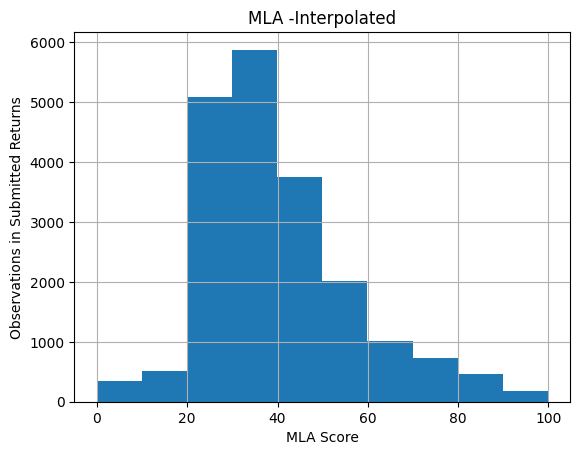

In [112]:
dfX_09[['MLA']][(dfX_09['MLA']>= 0) & (dfX_09['MLA']<= 100)].hist()
plt.title('MLA -Interpolated')
plt.ylabel('Observations in Submitted Returns')
plt.xlabel('MLA Score')
plt.plot()

[]

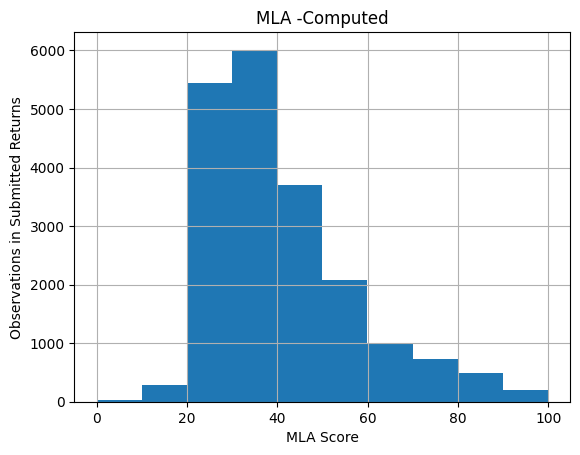

In [113]:
dfX_09[['XX_MLA']][(dfX_09['XX_MLA']>= 0) & (dfX_09['XX_MLA']<= 100)].hist()
plt.title('MLA -Computed')
plt.ylabel('Observations in Submitted Returns')
plt.xlabel('MLA Score')
plt.plot()

In [114]:
def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    
    use like:
    
    >>> confusion_matrix(test_df, 'actual_label', 'predicted_label')
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )

In [115]:
confusion_matrix(dfX_09, 'XX_MLA_CLASS2', 'MLA_CLASS2')
#two series of calculated and interpolated MLA are close

MLA_CLASS2,1,2,3,4,5
XX_MLA_CLASS2,,,,,
1,8364,521,66,33,116
2,604,4714,522,43,133
3,44,649,4479,94,183
4,0,1,45,130,21
5,0,1,0,15,100


#### Export Resulted Dataset as the Proposed Dataset in data\final\proposed_dataset_21082023.csv

In [116]:
#confirm expected data shape
dfX_09.shape

(20878, 50)

In [117]:
dfX_09.columns

Index(['REPORTINGDATE', 'INSTITUTIONCODE', '01_CURR_ACC', '02_TIME_DEPOSIT',
       '03_SAVINGS', '04_OTHER_DEPOSITS', '05_BANKS_DEPOSITS',
       '06_BORROWING_FROM_PUBLIC', '07_INTERBANKS_LOAN_PAYABLE',
       '08_CHEQUES_ISSUED', '09_PAY_ORDERS',
       '10_FOREIGN_DEPOSITS_AND_BORROWINGS', '11_OFF_BALSHEET_COMMITMENTS',
       '12_OTHER_LIABILITIES', '13_CASH', '14_CURRENT_ACC', '15_SMR_ACC',
       '16_FOREIGN CURRENCY', '17_OTHER DEPOSITS', '18_BANKS_TZ',
       '19_BANKS_ABROAD', '20_CHEQUES_ITEMS_FOR_CLEARING',
       '21_INTERBANK_LOANS', '22_TREASURY_BILLS', '23_OTHER_GOV_SECURITIES',
       '24_FOREIGN_CURRENCY', '25_COMMERCIAL_BILLS', '26_PROMISSORY_NOTES',
       'XX_CUSTOMER_DEPOSITS', 'XX_TOTAL_LIQUID_LIAB', 'XX_BOT_BALANCE',
       'XX_BAL_IN_OTHER_BANKS', 'XX_TOTAL_LIQUID_ASSET', 'XX_MLA',
       'F077_ASSETS_TOTAL', 'F125_LIAB_TOTAL', 'EWAQ_GrossLoans',
       'EWAQ_Capital', 'EWAQ_NPL', 'EWAQ_NPLsNetOfProvisions',
       'EWAQ_NPLsNetOfProvisions2CoreCapital', 'LR', 

In [118]:
dfX_09.head()

,REPORTINGDATE,INSTITUTIONCODE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,...,EWAQ_NPLsNetOfProvisions2CoreCapital,LR,DR,IBCM,GDP,INF,EWL_LIQUIDITY RATING,MLA,MLA_CLASS2,XX_MLA_CLASS2
3,2010-02-05,B5014,4.358491e+10,7.636494e+09,1.834680e+10,1052155.45,0.0,0.0,1.486844e+09,7.642781e+07,...,0.000003,14.634353,6.275245,1.314727,6.178466,10.973782,0,87.310386,1,1
4,2010-02-12,B5014,4.198509e+10,7.603740e+09,1.827224e+10,1052155.45,0.0,0.0,1.669462e+09,8.905947e+07,...,0.000004,14.635804,6.250326,1.315636,6.113955,10.765043,1,86.710114,1,1
5,2010-02-19,B5014,4.139788e+10,7.647355e+09,1.785701e+10,1052155.45,0.0,0.0,1.839116e+09,1.335379e+08,...,0.000004,14.640078,6.222785,1.331181,5.982211,10.549412,1,85.868650,1,1
6,2010-02-26,B5014,4.083612e+10,8.152346e+09,1.859316e+10,1052155.45,0.0,0.0,1.850474e+09,1.217606e+08,...,0.000002,14.646235,6.193496,1.356484,5.805644,10.329188,1,84.815457,1,1
7,2010-03-05,B5014,4.533415e+10,8.091856e+09,1.862976e+10,1052155.45,0.0,0.0,1.843065e+09,1.099271e+08,...,-0.000002,14.660432,6.133170,1.416849,5.407689,9.884145,1,82.191743,1,1


In [119]:
#Export to file for use in factors analysis 
dfX_09.to_csv(config.weekly_dataset)